# data 불러오기
- import version 설정(터미널에서 지정)
    * pip install scikit-learn==1.1
    * pip install imbalanced-learn==0.9


In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.ticker as mtick

# To ensure text placement and advanced grid layout
from matplotlib.gridspec import GridSpec



In [49]:
aug_train = pd.read_csv('data/aug_train.csv')
aug_test = pd.read_csv('data/aug_test.csv')
aug_train.head(3)

enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   

  major_discipline experience company_size company_type last_new_job  \
0             STEM        >20          NaN          NaN            1   
1             STEM         15        50-99      Pvt Ltd           >4   
2             STEM          5          NaN          NaN        never   

   training_hours  target  
0              36     1.0  
1              47     0.0  
2              83     0.0

## 결측치 확인

In [50]:
# Check for nulls
aug_train.isna().sum()/len(aug_train)

enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
last_new_job              0.022080
training_hours            0.000000
target                    0.000000
dtype: float64

## categorical data 정리

In [51]:
# I like to keep categorical data where I can, as perhaps the fact that we do not have a company size or the company type
# could actually tell us something.


aug_train['last_new_job'] = aug_train['last_new_job'].apply(lambda x: 'Never' if x == 'never' else x) #just reads nicer
aug_train['enrolled_university'][aug_train['enrolled_university'] == 'no_enrollment'] = 'No Enrollment' #just reads nicer
aug_train['company_size'] = aug_train['company_size'].apply(lambda x: '10-49' if x == '10/49' else x) #diff replacement method

aug_train['experience'] = aug_train['experience'].apply(lambda x: '0' if x == '<1' else x)
aug_train['experience'] = aug_train['experience'].apply(lambda x: '20' if x == '>20' else x)


aug_train['company_size'].fillna('0',inplace=True)
aug_train['company_type'].fillna('Unknown',inplace=True)
aug_train['major_discipline'].fillna('Unknown',inplace=True)
aug_train['gender'].fillna('Not provided',inplace=True)


# Repeat steps on Test set

aug_test['last_new_job'] = aug_test['last_new_job'].apply(lambda x: 'Never' if x == 'never' else x) #just reads nicer
aug_test['enrolled_university'][aug_test['enrolled_university'] == 'no_enrollment'] = 'No Enrollment' #just reads nicer
aug_test['company_size'] = aug_test['company_size'].apply(lambda x: '10-49' if x == '10/49' else x) #diff replacement method

aug_test['experience'] = aug_test['experience'].apply(lambda x: '0' if x == '<1' else x)
aug_test['experience'] = aug_test['experience'].apply(lambda x: '20' if x == '>20' else x)

aug_test['company_size'].fillna('0',inplace=True)
aug_test['company_type'].fillna('Unknown',inplace=True)
aug_test['major_discipline'].fillna('Unknown',inplace=True)
aug_test['gender'].fillna('Not provided',inplace=True)



# This is what I mean with respect to the gender categories:

aug_train['target'].groupby(aug_train['gender']).mean()

/var/folders/lw/1sybpw410f1113dmy6sq3n7r0000gn/T/ipykernel_5101/3164206888.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aug_train['enrolled_university'][aug_train['enrolled_university'] == 'no_enrollment'] = 'No Enrollment' #just reads nicer
/var/folders/lw/1sybpw410f1113dmy6sq3n7r0000gn/T/ipykernel_5101/3164206888.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aug_test['enrolled_university'][aug_test['enrolled_university'] == 'no_enrollment'] = 'No Enrollment' #just reads nicer


gender
Female          0.263328
Male            0.227819
Not provided    0.308119
Other           0.261780
Name: target, dtype: float64

### 결측치 있는 행 제거

In [52]:
# I will drop the remaining missing data

aug_train.dropna(inplace=True)
aug_test.dropna(inplace=True)
aug_train.isna().sum()/len(aug_train)

enrollee_id               0.0
city                      0.0
city_development_index    0.0
gender                    0.0
relevent_experience       0.0
enrolled_university       0.0
education_level           0.0
major_discipline          0.0
experience                0.0
company_size              0.0
company_type              0.0
last_new_job              0.0
training_hours            0.0
target                    0.0
dtype: float64

### 정수형으로 만들기

In [53]:
# Converting objects to integers

aug_train['experience'] = aug_train['experience'].astype(str).astype(int)
aug_test['experience'] = aug_test['experience'].astype(str).astype(int)

aug_train['training_hours'] = aug_train['training_hours'].astype(str).astype(int)
aug_test['training_hours'] = aug_test['training_hours'].astype(str).astype(int)

In [54]:
# Orders

ed_order = ['Primary School','High School','Graduate','Masters','Phd']
enroll_order = ['No Enrollment','Part time course','Full time course']
disc_order = ['STEM','Unknown','Humanities','Other','Business Degree','Arts','No Major']
exp_yrs_order = ['<1','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','>20']
exp_yrs_order_2 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
size_order = ['0','<10', '10-49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+']
job_order = ['Never', '1', '2', '3', '4', '>4']
exp_order =['No relevant experience','Has relevant experience']
gender_order = ['Male','Female','Other','Not provided']
company_order = ['Pvt Ltd','Unknown','Funded Startup','Public Sector','Early Stage Startup','NGO','Other']
 
# for visuals
train_df = aug_train
test_df = aug_test

# EDA

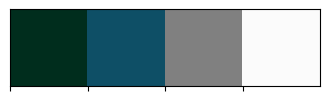

In [55]:
sns.palplot(['#002d1d','#0e4f66','gray','#fbfbfb'])

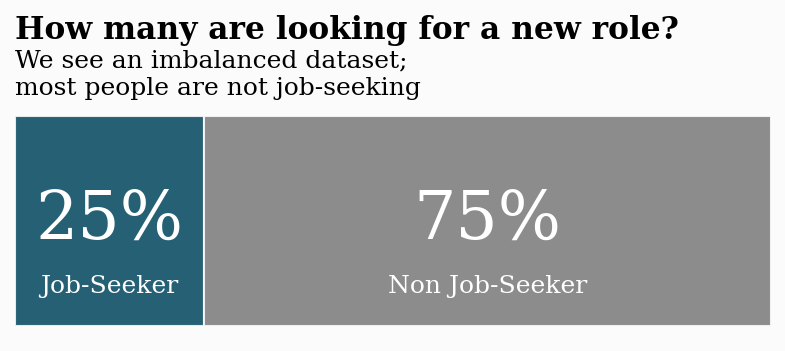

In [56]:
x=train_df.groupby(['target'])['target'].count()
y=len(train_df)
r=((x/y)).round(2)
ratio = pd.DataFrame(r).T


fig, ax = plt.subplots(1,1,figsize=(6.5, 2),dpi=150)
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color) 

ax.barh(ratio.index, ratio[1.0], color='#0e4f66', alpha=0.9, ec=background_color, label='Job-Seeker')
ax.barh(ratio.index, ratio[0.0], left=ratio[1.0], color='gray', alpha=0.9,ec=background_color, label='Non Job-Seeker')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.legend().set_visible(False)
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
for i in ratio.index:
    ax.annotate(f"{int(ratio[1.0][i]*100)}%", xy=(ratio[1.0][i]/2, i),va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='serif',color='white')
    ax.annotate("Job-Seeker", xy=(ratio[1.0][i]/2, -0.25),va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',color='white')
    
    
for i in ratio.index:
    ax.annotate(f"{int(ratio[0.0][i]*100)}%", xy=(ratio[1.0][i]+ratio[0.0][i]/2, i),va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='serif',color='white')
    ax.annotate("Non Job-Seeker", xy=(ratio[1.0][i]+ratio[0.0][i]/2, -0.25),va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',color='white')


fig.text(0.125,1.1,'How many are looking for a new role?', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.915,'We see an imbalanced dataset;\nmost people are not job-seeking',fontfamily='serif',fontsize=12)  


plt.show()

In [57]:
print("Columns in train_df:", train_df.columns)
print("Columns in test_df:", test_df.columns)

Columns in train_df: Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')
Columns in test_df: Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours'],
      dtype='object')


/var/folders/lw/1sybpw410f1113dmy6sq3n7r0000gn/T/ipykernel_5101/3613511356.py:78: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train["city_development_index"], ax=ax3,color="gray", shade=True, label="Train")
/var/folders/lw/1sybpw410f1113dmy6sq3n7r0000gn/T/ipykernel_5101/3613511356.py:79: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test["city_development_index"], ax=ax3, color="#0e4f66", shade=True, label="Test")
/var/folders/lw/1sybpw410f1113dmy6sq3n7r0000gn/T/ipykernel_5101/3613511356.py:144: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax7.set_yticklabels(labels = ['0   ', '5%','10%','15%'])


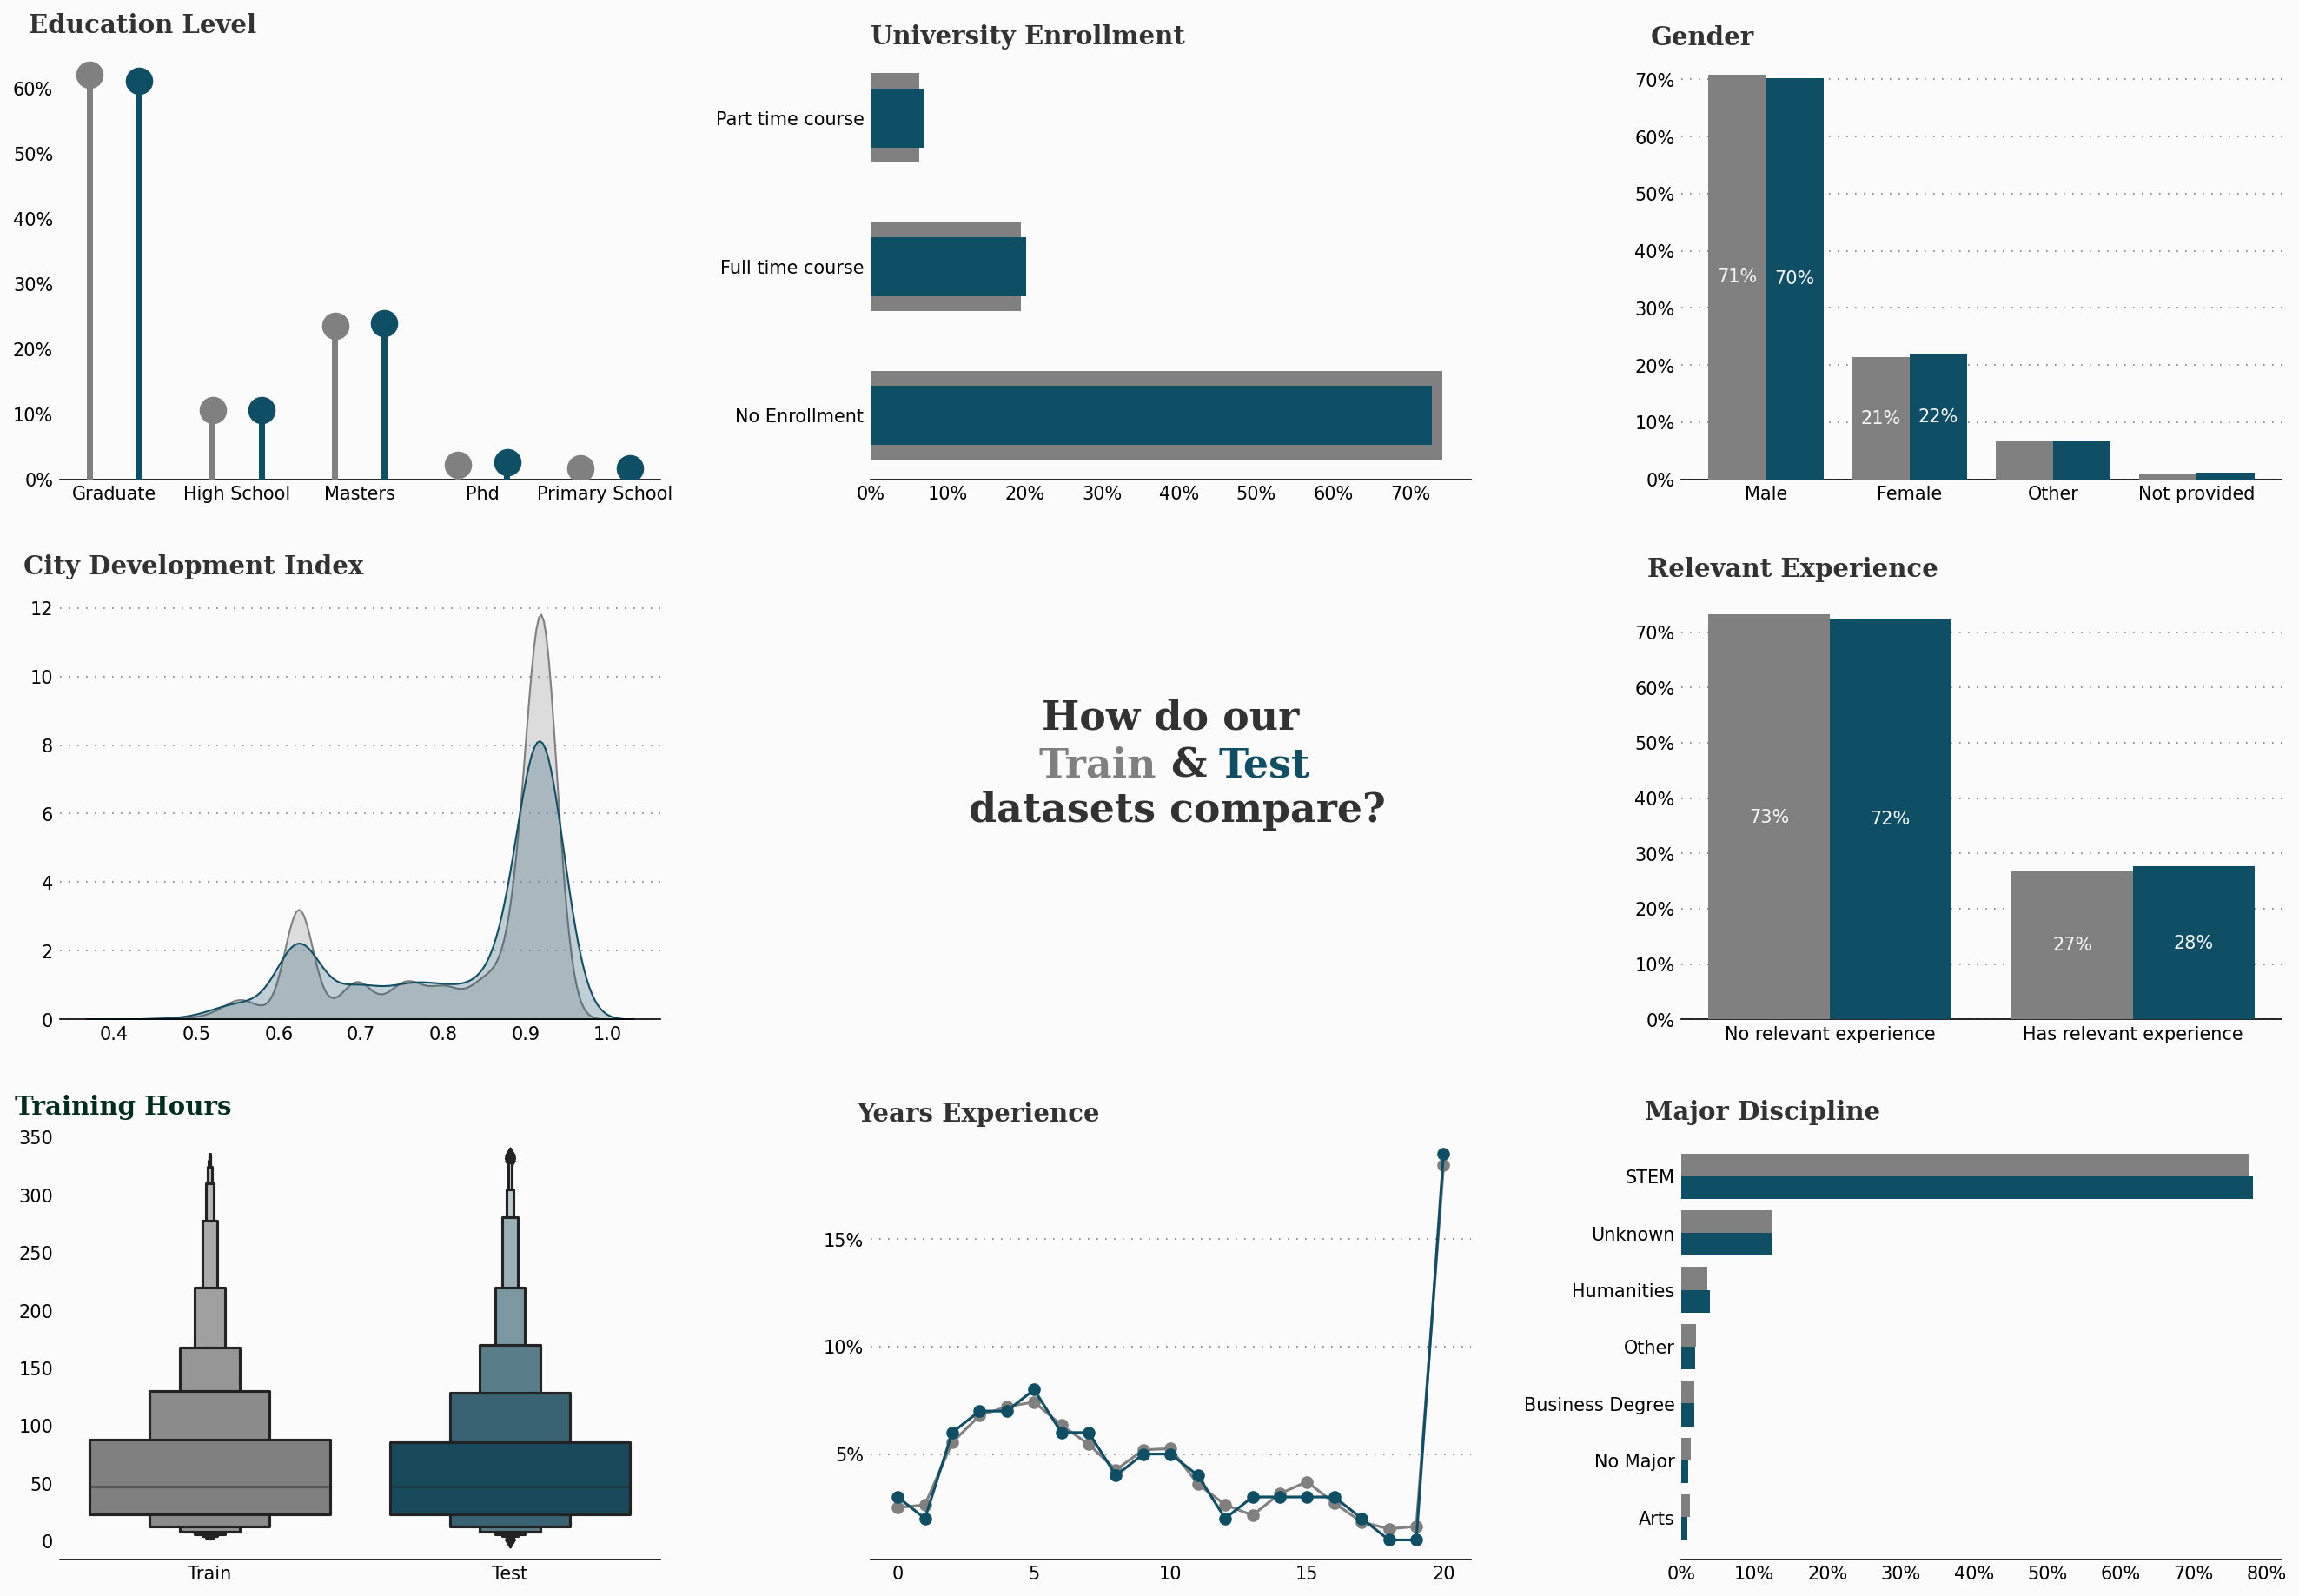

In [58]:
background_color = "#fbfbfb"

fig = plt.figure(figsize=(22,15),dpi=150)
fig.patch.set_facecolor(background_color)
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.35, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])


# Ax0 - EDUCATION LEVEL
train = pd.DataFrame(train_df["education_level"].value_counts())
train["Percentage"] = train["education_level"].apply(lambda x: x/sum(train["education_level"])*100)
train = train.sort_index()

test = pd.DataFrame(test_df["education_level"].value_counts())
test["Percentage"] = test["education_level"].apply(lambda x: x/sum(test["education_level"])*100)
test = test.sort_index()

ax0.bar(np.arange(len(train.index)), height=train["Percentage"], zorder=3, color="gray", width=0.05)
ax0.scatter(np.arange(len(train.index)), train["Percentage"], zorder=3,s=200, color="gray")
ax0.bar(np.arange(len(test.index))+0.4, height=test["Percentage"], zorder=3, color="#0e4f66", width=0.05)
ax0.scatter(np.arange(len(test.index))+0.4, test["Percentage"], zorder=3,s=200, color="#0e4f66")
ax0.text(-0.5, 68.5, 'Education Level', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax0.yaxis.set_major_formatter(mtick.PercentFormatter())
ax0.yaxis.set_major_locator(mtick.MultipleLocator(10))
ax0.set_xticks(np.arange(len(train.index))+0.4 / 2)
ax0.set_xticklabels(list(train.index),rotation=0)


# Ax1 - ENROLLED IN UNIVESITY
train = pd.DataFrame(train_df["enrolled_university"].value_counts())
train["Percentage"] = train["enrolled_university"].apply(lambda x: x/sum(train["enrolled_university"])*100).loc[enroll_order]
test = pd.DataFrame(test_df["enrolled_university"].value_counts())
test["Percentage"] = test["enrolled_university"].apply(lambda x: x/sum(test["enrolled_university"])*100).loc[enroll_order]

ax1.text(0, 2.5, 'University Enrollment', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax1.barh(train.index, train['Percentage'], color="gray", zorder=3, height=0.6)
ax1.barh(test.index, test['Percentage'], color="#0e4f66", zorder=3, height=0.4)
ax1.xaxis.set_major_formatter(mtick.PercentFormatter())
ax1.xaxis.set_major_locator(mtick.MultipleLocator(10))

###
# Ax2 - GENDER 
train = pd.DataFrame(train_df["gender"].value_counts())
train["Percentage"] = train["gender"].apply(lambda x: x/sum(train["gender"])*100)
test = pd.DataFrame(test_df["gender"].value_counts())
test["Percentage"] = test["gender"].apply(lambda x: x/sum(test["gender"])*100)

x = np.arange(len(train))
ax2.text(-0.6, 76, 'Gender', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax2.bar(x, height=train["Percentage"], zorder=3, color="gray", width=0.4)
ax2.bar(x+0.4, height=test["Percentage"], zorder=3, color="#0e4f66", width=0.4)
ax2.set_xticks(x + 0.4 / 2)
ax2.set_xticklabels(['Male','Female','Other','Not provided'])
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_locator(mtick.MultipleLocator(10))
for i,j in zip([0, 1], train["Percentage"]):
    ax2.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], test["Percentage"]):
    ax2.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
    

    
## Ax 3 - CDI

ax3.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
train = pd.DataFrame(train_df["city_development_index"])
test = pd.DataFrame(test_df["city_development_index"])
sns.kdeplot(train["city_development_index"], ax=ax3,color="gray", shade=True, label="Train")
sns.kdeplot(test["city_development_index"], ax=ax3, color="#0e4f66", shade=True, label="Test")
ax3.text(0.29, 13, 'City Development Index', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax3.yaxis.set_major_locator(mtick.MultipleLocator(2))
ax3.set_ylabel('')    
ax3.set_xlabel('')

## AX4 - TITLE

ax4.spines["bottom"].set_visible(False)
ax4.tick_params(left=False, bottom=False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.text(0.5, 0.6, 'How do our\n\n datasets compare?', horizontalalignment='center', verticalalignment='center',fontsize=22, fontweight='bold', fontfamily='serif', color="#323232")
ax4.text(0.28,0.57,"Train", fontweight="bold", fontfamily='serif', fontsize=22, color='gray')
ax4.text(0.5,0.57,"&", fontweight="bold", fontfamily='serif', fontsize=22, color='#323232')
ax4.text(0.58,0.57,"Test", fontweight="bold", fontfamily='serif', fontsize=22, color='#0e4f66')




### Ax5 - RELEVANT EXPERIENCE
train = pd.DataFrame(train_df["relevent_experience"].value_counts())
train["Percentage"] = train["relevent_experience"].apply(lambda x: x/sum(train["relevent_experience"])*100)
test = pd.DataFrame(test_df["relevent_experience"].value_counts())
test["Percentage"] = test["relevent_experience"].apply(lambda x: x/sum(test["relevent_experience"])*100)
x = np.arange(len(train))
ax5.text(-0.4, 80, 'Relevant Experience', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax5.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax5.bar(x, height=train["Percentage"], zorder=3, color="gray", width=0.4)
ax5.bar(x+0.4, height=test["Percentage"], zorder=3, color="#0e4f66", width=0.4)
ax5.set_xticks(x + 0.4 / 2)
ax5.set_xticklabels(['No relevant experience','Has relevant experience'])
ax5.yaxis.set_major_formatter(mtick.PercentFormatter())
ax5.yaxis.set_major_locator(mtick.MultipleLocator(10))

for i,j in zip([0, 1, 2], train["Percentage"]):
    ax5.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1, 2], test["Percentage"]):
    ax5.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')

    
    
# Ax6 - TRAINING HOURS
train = pd.DataFrame(train_df["training_hours"])
train["TrainTest"] = "Train"
test = pd.DataFrame(test_df["training_hours"])
test["TrainTest"] = "Test"
ax6.text(-0.65, 370, 'Training Hours', fontsize=14, fontweight='bold', fontfamily='serif', color="#002d1d")
comb_graph_temp_df = pd.concat([train, test], axis=0)
sns.boxenplot(ax=ax6, y="training_hours", x="TrainTest", data=comb_graph_temp_df, palette=["gray", "#0e4f66"])
ax6.set_xlabel("")
ax6.set_ylabel("")


# Ax7 - EXPERIENCE YRS
train = pd.DataFrame(train_df["experience"].value_counts())
train["Percentage"] = train["experience"].apply(lambda x: x/sum(train["experience"])*100)
train = train.sort_index()
test = pd.DataFrame(test_df["experience"].value_counts())
test["Percentage"] = round(test["experience"].apply(lambda x: x/sum(test["experience"])*100),).astype(int)
test = test.sort_index()
ax7.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax7.plot(train.index, train["Percentage"], zorder=3, color="gray", marker='o')
ax7.plot(test.index, test["Percentage"], zorder=3, color="#0e4f66", marker='o')
ax7.text(-1.5, 20.5, 'Years Experience', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax7.set_yticklabels(labels = ['0   ', '5%','10%','15%'])
ax7.xaxis.set_major_locator(mtick.MultipleLocator(5))
ax7.yaxis.set_major_locator(mtick.MultipleLocator(5))


# Ax8 - MAJOR DISCIPLINE
train = pd.DataFrame(train_df["major_discipline"].value_counts())
train["Percentage"] = train["major_discipline"].apply(lambda x: x/sum(train["major_discipline"])*100)
test = pd.DataFrame(test_df["major_discipline"].value_counts())
test["Percentage"] = test["major_discipline"].apply(lambda x: x/sum(test["major_discipline"])*100)

ax8.barh(np.arange(len(train.index)), train["Percentage"], zorder=3, color="gray", height=0.4)
ax8.barh(np.arange(len(test.index))+0.4, test["Percentage"], zorder=3, color="#0e4f66", height=0.4)
ax8.text(-5, -0.8, 'Major Discipline', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax8.xaxis.set_major_formatter(mtick.PercentFormatter())
ax8.yaxis.set_major_locator(mtick.MultipleLocator(1))
ax8.set_yticks(np.arange(len(test.index))+0.4 / 2)
ax8.set_yticklabels(list(test.index))
ax8.invert_yaxis()



for i in range(0,9):
    locals()["ax"+str(i)].set_facecolor(background_color) 
    
for i in range(0,9):
    locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both',length=0)


for s in ["top","right","left"]:
    for i in range(0,9):
        locals()["ax"+str(i)].spines[s].set_visible(False)

plt.show()

/var/folders/lw/1sybpw410f1113dmy6sq3n7r0000gn/T/ipykernel_5101/375850010.py:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df["city_development_index"], color="#247747", shade=True, ax=ax2, zorder=3)


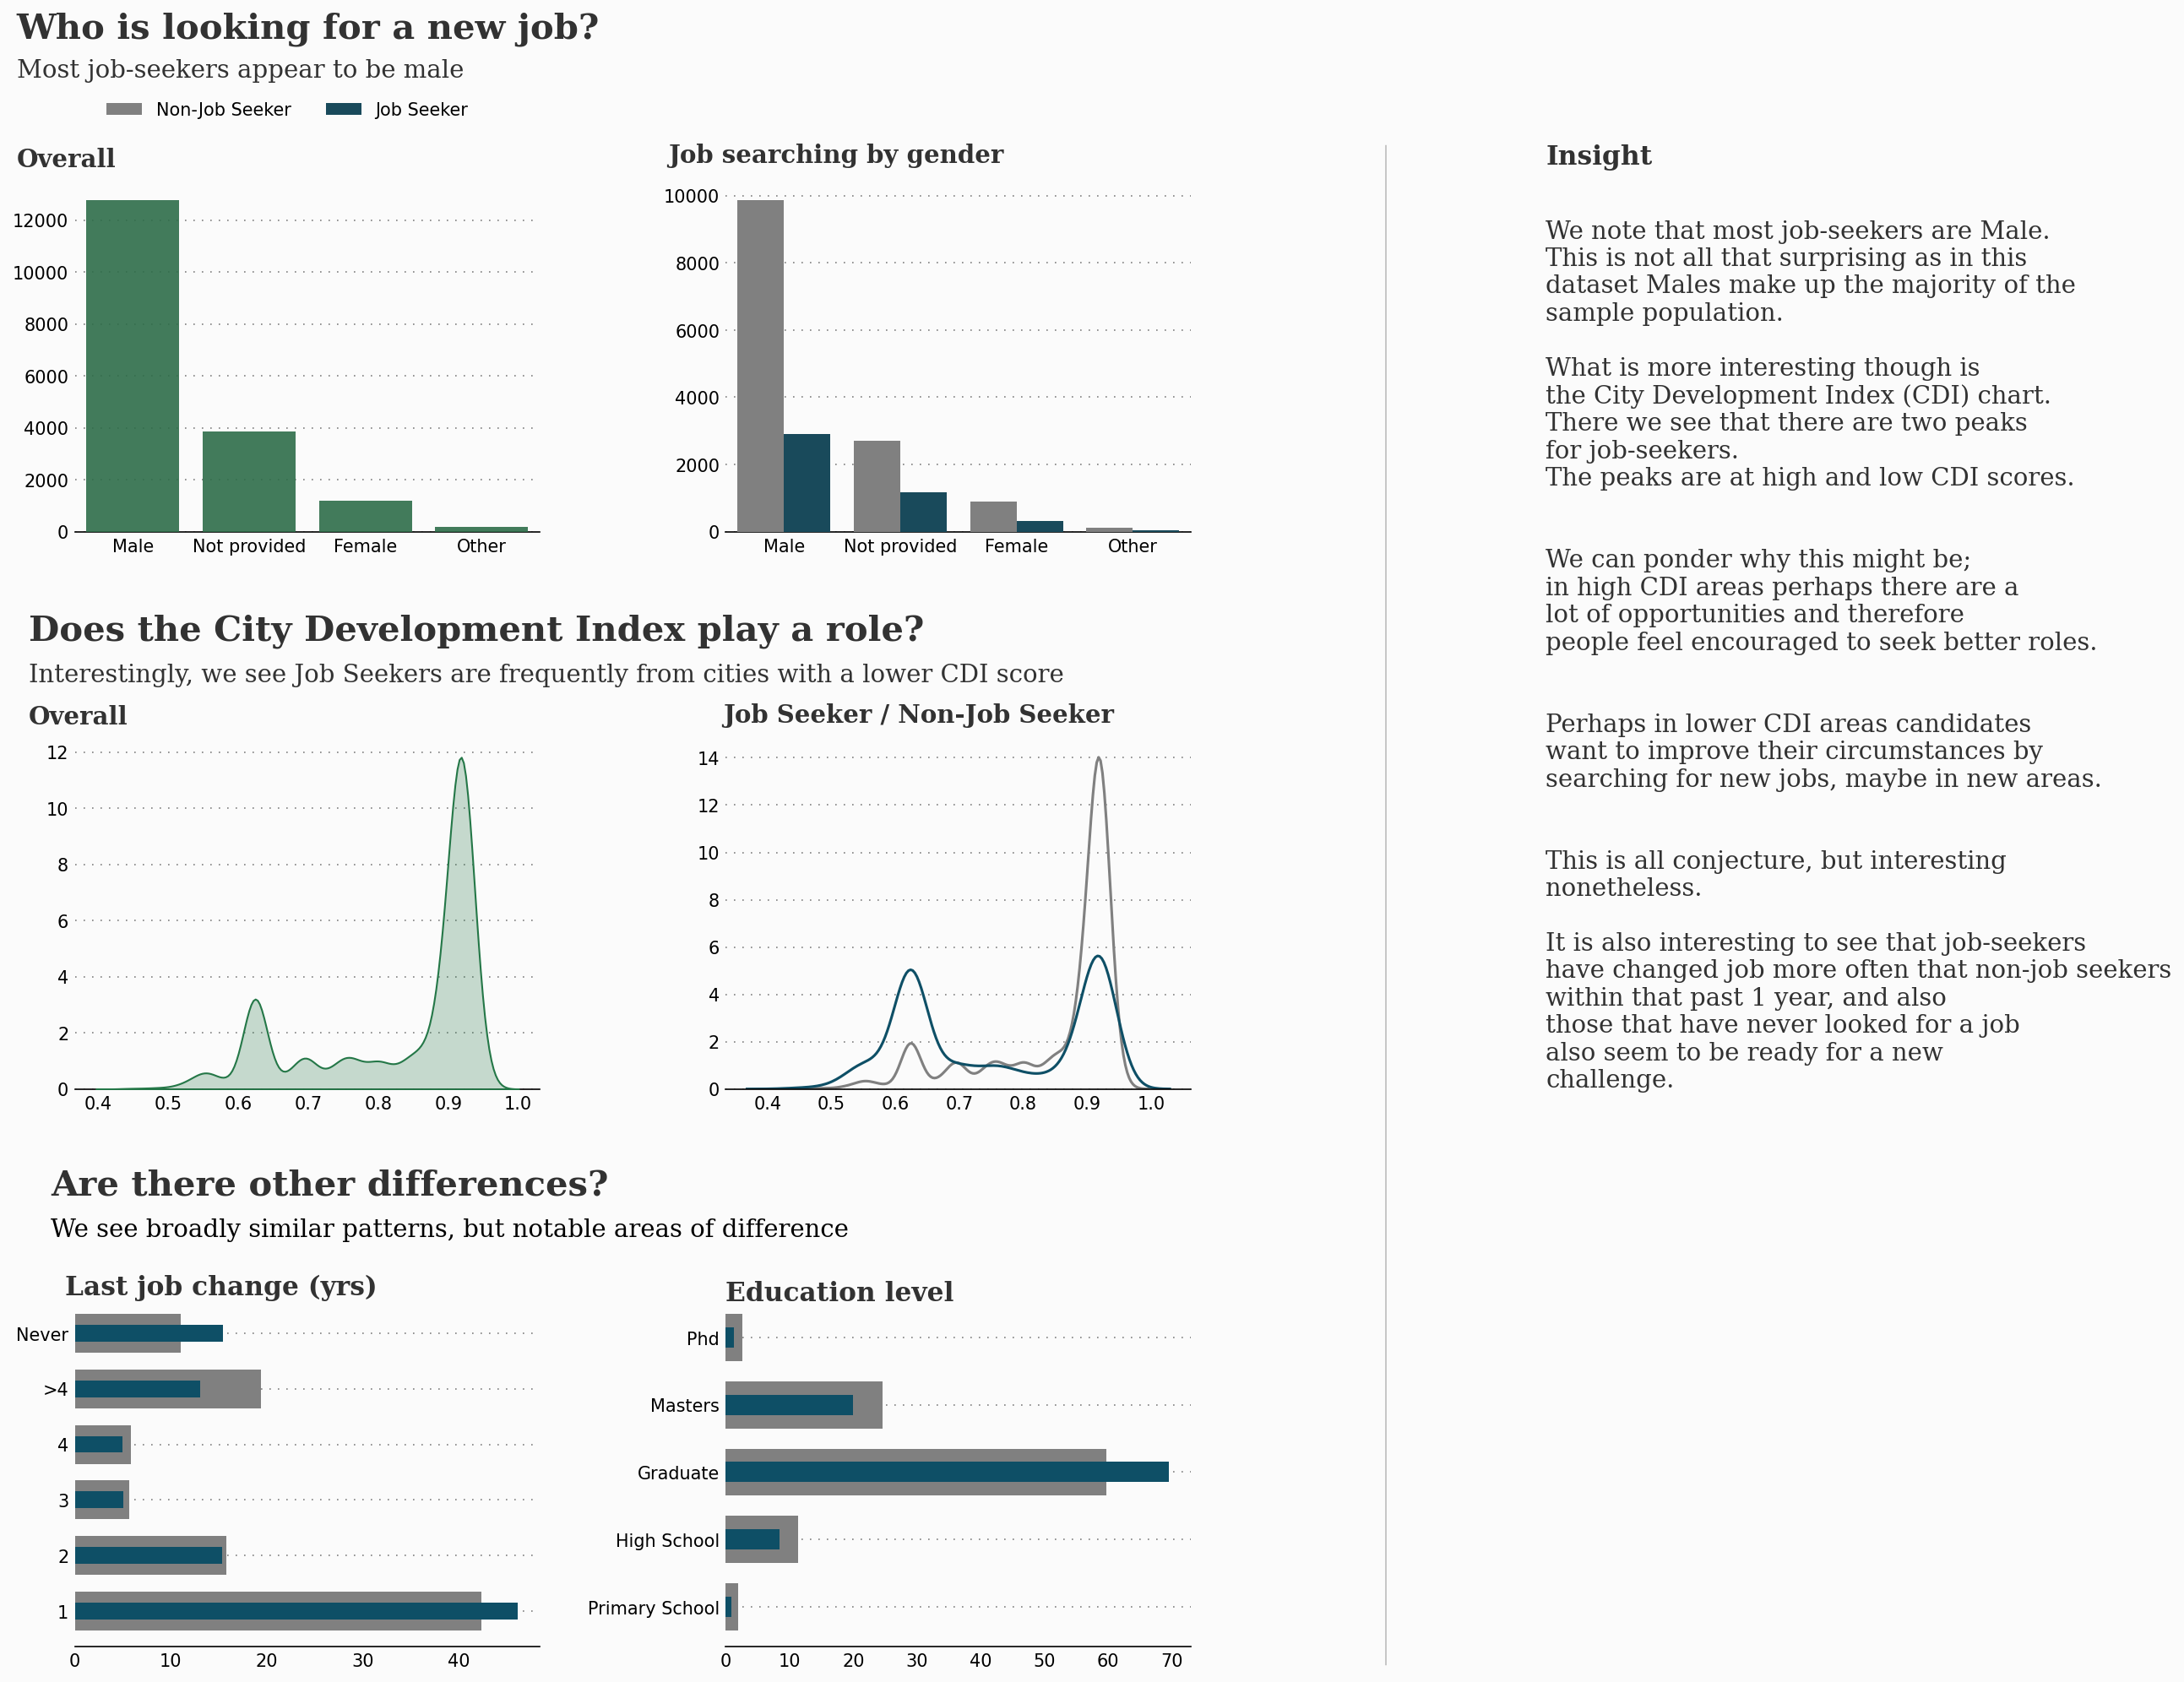

In [59]:
color_palette=["gray","#0e4f66"]
fig = plt.figure(figsize=(18,15), dpi=150)
fig.patch.set_facecolor(background_color) # figure background color
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.4, hspace=0.6)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])

# Distribution
ax0.text(-1, 19000, 'Who is looking for a new job?', fontsize=20, fontweight='bold', fontfamily='serif', color="#323232")
ax0.text(-1, 17500, 'Most job-seekers appear to be male', fontsize=14, fontweight='light', fontfamily='serif', color="#323232")
ax0.text(-1, 14050, 'Overall', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
sns.countplot(x=train_df["gender"], color="#247747", ax=ax0, zorder=3,alpha=0.9)



# Gender
ax1.text(-1, 11000, 'Job searching by gender', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
sns.countplot(x="gender", hue="target", data=train_df, palette=color_palette, ax=ax1, zorder=3)
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ["Non-Job Seeker", "Job Seeker"], ncol=2, bbox_to_anchor=(-0.52, 1.28), facecolor=background_color, edgecolor=background_color)



# CDI
ax2.text(0.3, 16, 'Does the City Development Index play a role?', fontsize=20, fontweight='bold', fontfamily='serif', color="#323232")
ax2.text(0.3, 14.5, 'Interestingly, we see Job Seekers are frequently from cities with a lower CDI score', fontsize=14, fontweight='light', fontfamily='serif', color="#323232")
ax2.text(0.3, 13, 'Overall', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
sns.kdeplot(train_df["city_development_index"], color="#247747", shade=True, ax=ax2, zorder=3)



ax3.text(0.33, 15.5, 'Job Seeker / Non-Job Seeker', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
sns.kdeplot(train_df.loc[(train_df["target"]==0), "city_development_index"], color="gray", label="Not Survived", ax=ax3)
sns.kdeplot(train_df.loc[(train_df["target"]==1), "city_development_index"], color="#0e4f66", label="Survived", ax=ax3)



###
aug_train['count'] = 1
job_hunt_only = aug_train[aug_train['target']==1]
no_job_hunt_only = aug_train[aug_train['target']==0]

job_change = aug_train.groupby(['education_level','last_new_job'])['experience'].sum().unstack().loc[ed_order,job_order]

job_hunt_only.groupby(['target','last_new_job'])['count'].sum().unstack()
notseek_job_change = no_job_hunt_only.groupby(['target','last_new_job'])['count'].sum().unstack().T
seek_job_change = job_hunt_only.groupby(['target','last_new_job'])['count'].sum().unstack().T

notseek_job_change.columns = ['count']
seek_job_change.columns = ['count']

notseek_job_change["percentage"] = notseek_job_change["count"].apply(lambda x: x/sum(notseek_job_change["count"])) *100
seek_job_change["percentage"] = seek_job_change["count"].apply(lambda x: x/sum(seek_job_change["count"])) *100


ed_notseek_job_change = no_job_hunt_only.groupby(['target','education_level'])['count'].sum().unstack().T.loc[ed_order]
ed_seek_job_change = job_hunt_only.groupby(['target','education_level'])['count'].sum().unstack().T.loc[ed_order]

ed_notseek_job_change.columns = ['count']
ed_seek_job_change.columns = ['count']

ed_notseek_job_change["percentage"] = ed_notseek_job_change["count"].apply(lambda x: x/sum(ed_notseek_job_change["count"])) *100
ed_seek_job_change["percentage"] = ed_seek_job_change["count"].apply(lambda x: x/sum(ed_seek_job_change["count"])) *100

###


ax4.barh(notseek_job_change.index, notseek_job_change['percentage'], color="gray", zorder=3, height=0.7)
ax4.barh(seek_job_change.index, seek_job_change['percentage'], color="#0e4f66", zorder=3, height=0.3)
ax4.xaxis.set_major_locator(mtick.MultipleLocator(10))


##
ax5.barh(ed_notseek_job_change.index, ed_notseek_job_change['percentage'], color="gray", zorder=3, height=0.7)
ax5.barh(ed_seek_job_change.index, ed_seek_job_change['percentage'], color="#0e4f66", zorder=3, height=0.3)
ax5.xaxis.set_major_locator(mtick.MultipleLocator(10))

##
ax4.text(-1, 5.7, 'Last job change (yrs)',fontsize=15, fontweight='bold', fontfamily='serif',color='#323232')
ax5.text(0, 4.55, 'Education level', fontsize=15, fontweight='bold', fontfamily='serif',color='#323232')

ax4.text(-2.5, 7.5, 'Are there other differences?', 
         fontsize=20, fontweight='bold', fontfamily='serif',color='#323232')

ax4.text(-2.5, 6.75, 
         'We see broadly similar patterns, but notable areas of difference', 
         fontsize=14, fontweight='light', fontfamily='serif')


####

fig.text(0.77, 0.89
         , 'Insight', fontsize=15, fontweight='bold', fontfamily='serif',color='#323232')

fig.text(0.77, 0.39, '''
We note that most job-seekers are Male.
This is not all that surprising as in this
dataset Males make up the majority of the
sample population.

What is more interesting though is
the City Development Index (CDI) chart.
There we see that there are two peaks
for job-seekers. 
The peaks are at high and low CDI scores. 


We can ponder why this might be;
in high CDI areas perhaps there are a 
lot of opportunities and therefore
people feel encouraged to seek better roles.


Perhaps in lower CDI areas candidates
want to improve their circumstances by
searching for new jobs, maybe in new areas. 


This is all conjecture, but interesting
nonetheless.

It is also interesting to see that job-seekers
have changed job more often that non-job seekers
within that past 1 year, and also
those that have never looked for a job
also seem to be ready for a new
challenge.
'''
         , fontsize=14, fontweight='light', fontfamily='serif',color='#323232')



import matplotlib.lines as lines
l1 = lines.Line2D([0.7, 0.7], [0.1, 0.9], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

for s in ["top","right","left"]:
    for i in range(0,6):
        locals()["ax"+str(i)].spines[s].set_visible(False)
        
for i in range(0,6):
        locals()["ax"+str(i)].set_facecolor(background_color)
        locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both',length=0)
        locals()["ax"+str(i)].grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))      

        
for x in range(0,4):
    for y in range(0,4):
        locals()["ax"+str(x)].set_xlabel("")
        locals()["ax"+str(y)].set_ylabel("")

plt.show()

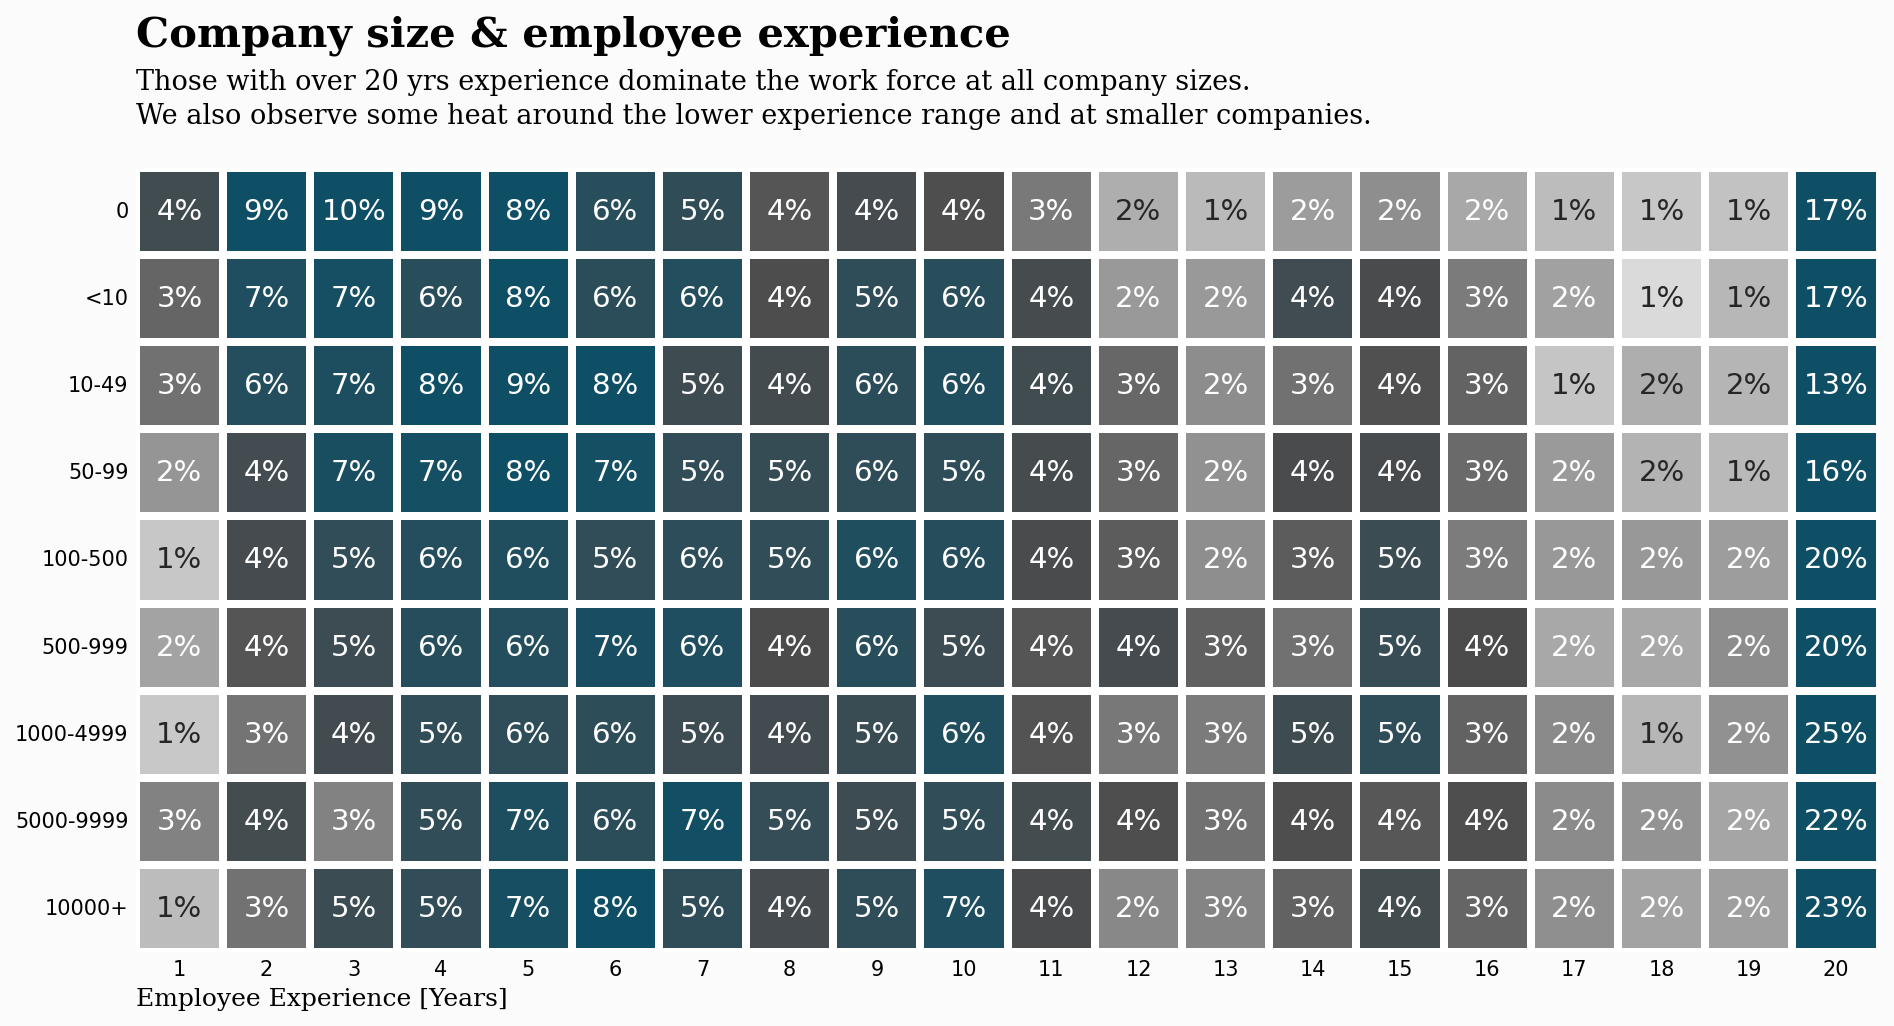

In [60]:
pv_gen_size = pd.pivot_table(aug_train, values='count',index=['gender'],columns=['company_size'],aggfunc=np.sum).loc[gender_order, size_order]
ct_gen_size = pd.crosstab(aug_train['company_size'],aug_train['experience'], normalize='index').loc[size_order,exp_yrs_order_2]


fig = plt.figure(figsize=(15,10), dpi=150) 
fig.patch.set_facecolor(background_color)
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0, hspace=-0.09)
ax0 = fig.add_subplot(gs[:,:])

colors = ["#fbfbfb", "#4b4b4c","#0e4f66"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

sns.heatmap(ax=ax0, data=ct_gen_size, linewidths=.1, vmin=0, vmax=0.075,
            square=True, cbar=False, cmap=colormap,linewidth=3, annot=True, fmt='1.0%',annot_kws={"fontsize":14})

 
ax0.set_facecolor(background_color) 
ax0.set_xlabel("Employee Experience [Years]",fontfamily='serif',fontsize=12,loc='left')
ax0.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)

    
ax0.text(0, -1.4, 
         'Company size & employee experience', 
         fontsize=20, 
         fontweight='bold', 
         fontfamily='serif',
        )

ax0.text(0, -0.9, 
         'Those with over 20 yrs experience dominate the work force at all company sizes.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )
ax0.text(0, -0.5, 
         'We also observe some heat around the lower experience range and at smaller companies.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )

ax0.tick_params(axis=u'both', which=u'both',length=0)
plt.show()

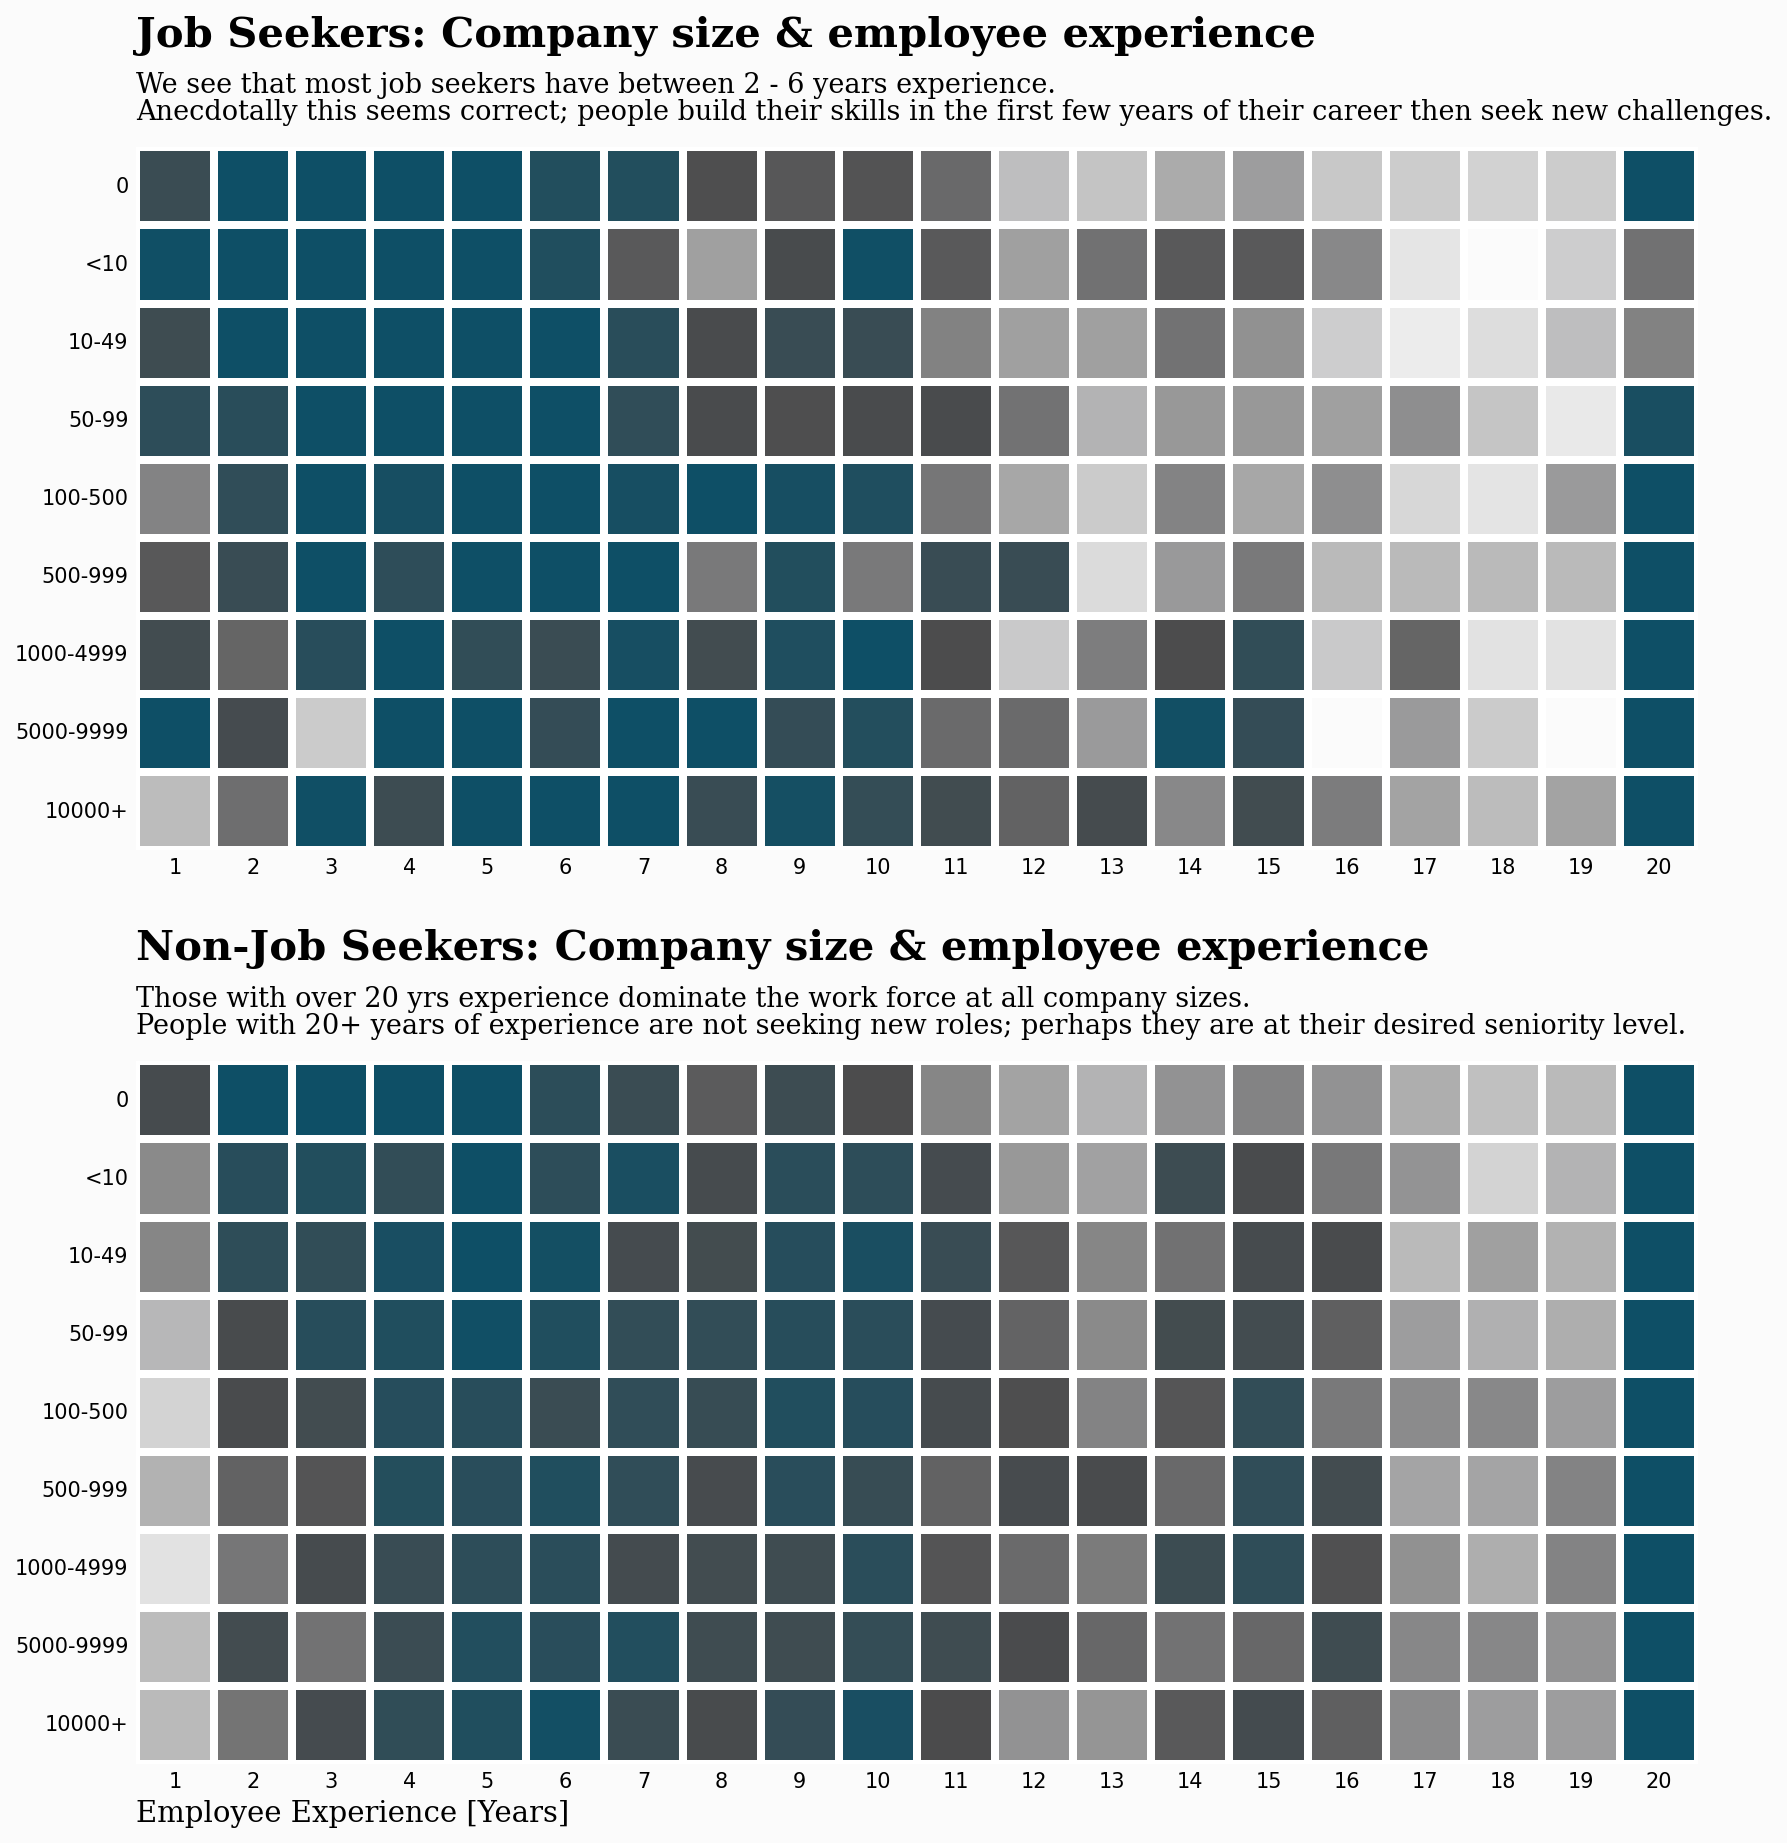

In [61]:
job_hunt_only = aug_train[aug_train['target']==1]
no_job_hunt_only = aug_train[aug_train['target']==0]

job_seek = pd.crosstab(job_hunt_only['company_size'],job_hunt_only['experience'], normalize='index').loc[size_order,exp_yrs_order_2]
no_seek = pd.crosstab(no_job_hunt_only['company_size'],no_job_hunt_only['experience'], normalize='index').loc[size_order,exp_yrs_order_2]

###
fig = plt.figure(figsize=(14,14),dpi=150)
fig.patch.set_facecolor(background_color)
gs = fig.add_gridspec(2, 3)
gs.update(wspace=0.2, hspace=0.3)
ax0 = fig.add_subplot(gs[0,:])
ax1 = fig.add_subplot(gs[1,:])


colors = ["#fbfbfb", "#4b4b4c","#0e4f66"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

sns.heatmap(ax=ax0, data=job_seek, linewidths=.1, vmin=0, vmax=0.075,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap,linewidth=3, annot=False, fmt='1.0%',annot_kws={"fontsize":14})

sns.heatmap(ax=ax1, data=no_seek, linewidths=.1, vmin=0, vmax=0.075,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap,linewidth=3, annot=False, fmt='1.0%',annot_kws={"fontsize":14})

ax0.set_facecolor(background_color) 
ax0.set_xlabel("")
ax0.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)

    
ax0.set_xlabel("")
ax0.set_ylabel("")
ax1.set_xlabel("Employee Experience [Years]",fontfamily='serif',fontsize=14,loc='left')
ax1.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)

    
ax0.text(0, -1.3, 
         'Job Seekers: Company size & employee experience', 
         fontsize=20, 
         fontweight='bold', 
         fontfamily='serif',
        )

ax1.text(0, -0.7, 
         'Those with over 20 yrs experience dominate the work force at all company sizes.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )
ax1.text(0, -0.35, 
         'People with 20+ years of experience are not seeking new roles; perhaps they are at their desired seniority level.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )
    
ax1.text(0, -1.3, 
         'Non-Job Seekers: Company size & employee experience', 
         fontsize=20, 
         fontweight='bold', 
         fontfamily='serif',
        )

ax0.text(0, -0.7, 
         'We see that most job seekers have between 2 - 6 years experience.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )
ax0.text(0, -0.35, 
         'Anecdotally this seems correct; people build their skills in the first few years of their career then seek new challenges.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )

ax0.tick_params(axis=u'both', which=u'both',length=0)
ax1.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

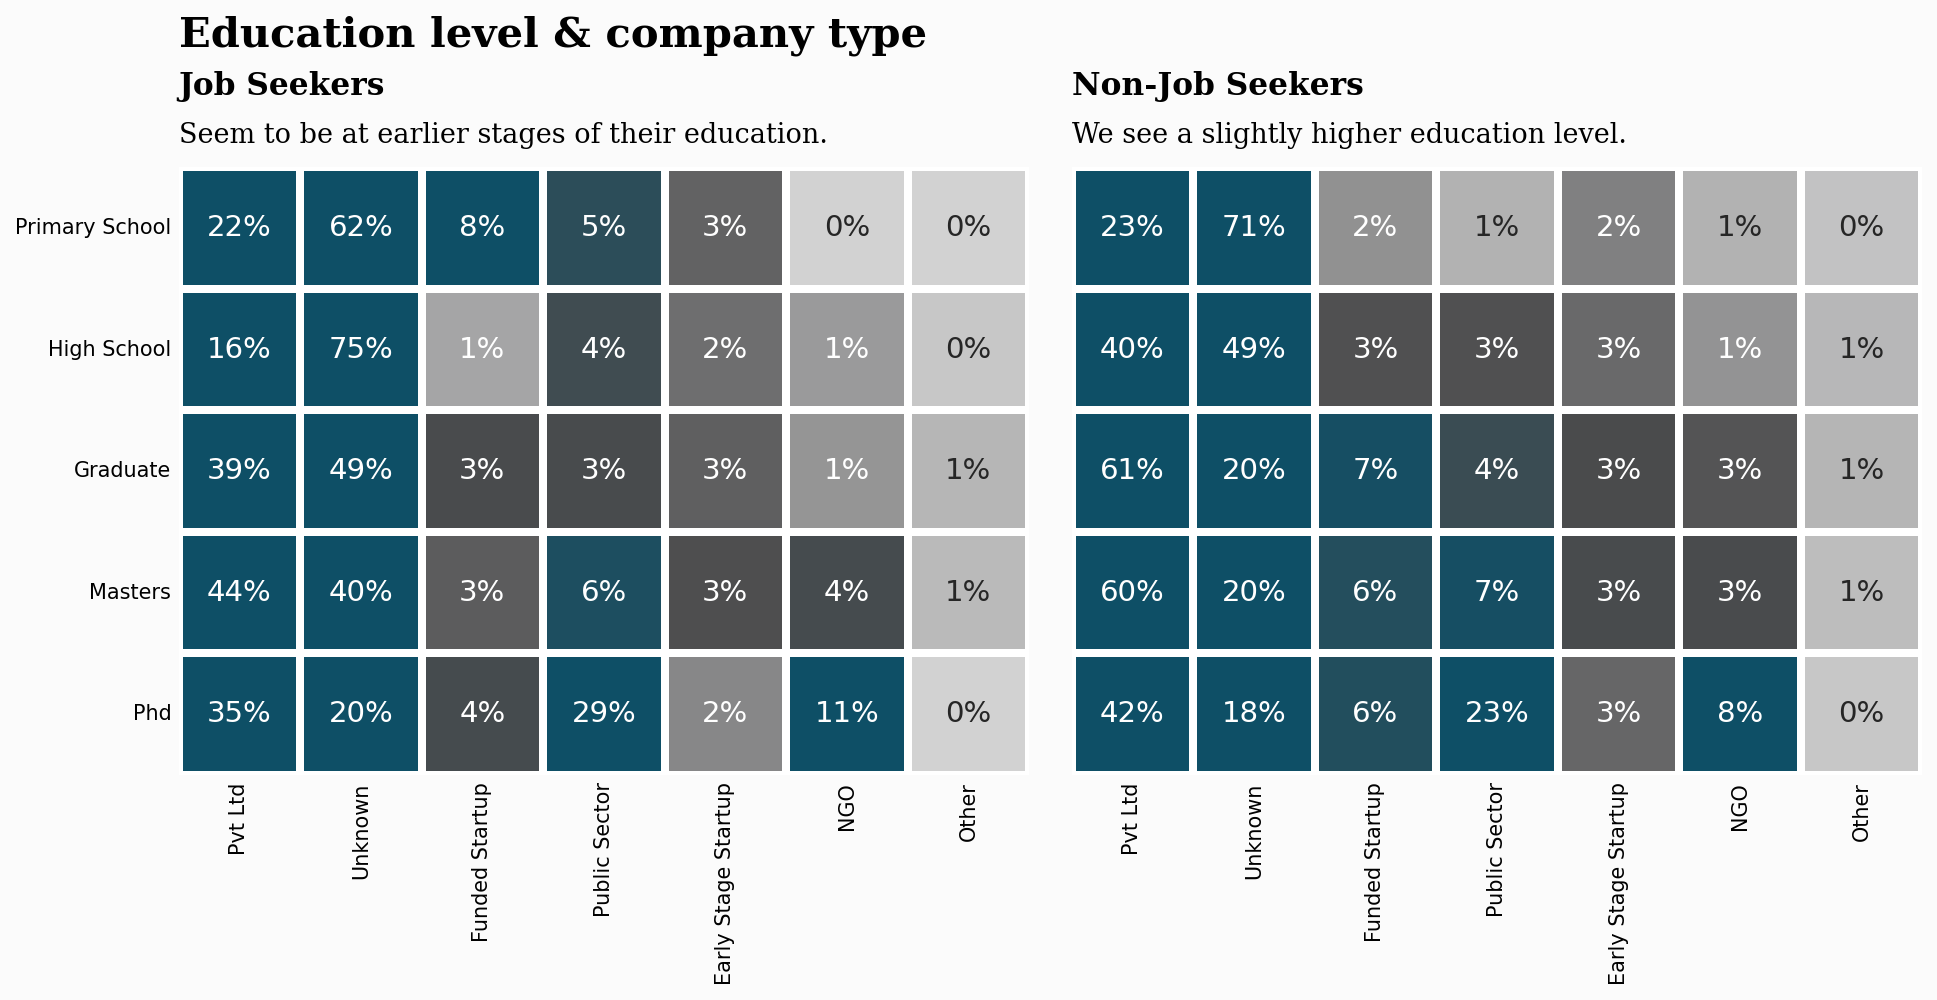

In [62]:
job_hunt_only = aug_train[aug_train['target']==1]
no_job_hunt_only = aug_train[aug_train['target']==0]

job_seek = pd.crosstab(job_hunt_only['education_level'],job_hunt_only['company_type'], normalize='index').loc[ed_order,company_order]
no_seek = pd.crosstab(no_job_hunt_only['education_level'],no_job_hunt_only['company_type'], normalize='index').loc[ed_order,company_order]


fig = plt.figure(figsize=(15,15),dpi=150)
fig.patch.set_facecolor(background_color)

gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.05, hspace=0.3)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])


colors = ["#fbfbfb", "#4b4b4c","#0e4f66"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

sns.heatmap(ax=ax0, data=job_seek, linewidths=.1, vmin=-0.01, vmax=0.075,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap,linewidth=3, annot=True, fmt='1.0%',annot_kws={"fontsize":14})

sns.heatmap(ax=ax1, data=no_seek, linewidths=.1, vmin=-0.01, vmax=0.075,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,yticklabels=False, cmap=colormap,linewidth=3, annot=True, fmt='1.0%',annot_kws={"fontsize":14})


ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color) 
ax0.set_xlabel("")
ax0.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)


ax1.set_xlabel("")
ax1.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    
    
ax0.text(0, -1, 
         'Education level & company type', 
         fontsize=20, 
         fontweight='bold', 
         fontfamily='serif',
        )

ax0.text(0, -0.6, 
         'Job Seekers', 
         fontsize=15, 
         fontweight='bold', 
         fontfamily='serif',
        )

ax0.text(0, -0.2, 
         'Seem to be at earlier stages of their education.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )


###

ax1.text(0, -0.6, 
         'Non-Job Seekers', 
         fontsize=15, 
         fontweight='bold', 
         fontfamily='serif',
        )
ax1.text(0, -0.2, 
         'We see a slightly higher education level.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )
    

ax0.tick_params(axis=u'both', which=u'both',length=0)
ax1.tick_params(axis=u'both', which=u'both',length=0)
plt.show()

In [63]:
# Orders

ed_order = ['Primary School','High School','Graduate','Masters','Phd']
enroll_order = ['No Enrollment','Part time course','Full time course']
disc_order = ['STEM','Unknown','Humanities','Other','Business Degree','Arts','No Major']
exp_yrs_order = ['<1','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','>20']
size_order = ['0','<10', '10-49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+']
job_order = ['Never', '1', '2', '3', '4', '>4']
exp_order =['No relevant experience','Has relevant experience']
gender_order = ['Male','Female','Other','Not provided']
company_order = ['Pvt Ltd','Unknown','Funded Startup','Public Sector','Early Stage Startup','NGO','Other']

In [64]:
data = train_df
data['count'] = 1

data_plot = pd.pivot_table(data, values='count', index=['major_discipline'], columns=['company_size'], aggfunc=np.sum).fillna(0).astype(int).stack().loc[disc_order, size_order]
data_job_seek = pd.pivot_table(data[data['target']==1], values='count', index=['major_discipline'], columns=['company_size'], aggfunc=np.sum).fillna(0).astype(int).stack().loc[disc_order, size_order]
data_no_job_seek = pd.pivot_table(data[data['target']==0], values='count', index=['major_discipline'], columns=['company_size'], aggfunc=np.sum).fillna(0).astype(int).stack().loc[disc_order, size_order]

In [65]:
# https://stackoverflow.com/questions/56337732/how-to-plot-scatter-pie-chart-using-matplotlib
def drawPieMarker(xs, ys, ratios, sizes, colors, ax):
    markers = []
    previous = 0
    # calculate the points of the pie pieces
    for color, ratio in zip(colors, ratios):
        this = 2 * np.pi * ratio + previous
        x  = [0] + np.cos(np.linspace(previous, this, 30)).tolist() + [0]
        y  = [0] + np.sin(np.linspace(previous, this, 30)).tolist() + [0]
        xy = np.column_stack([x, y])
        previous = this
        markers.append({'marker':xy, 's':np.abs(xy).max()**2*np.array(sizes), 'facecolor':color})

    # scatter each of the pie pieces to create pies
    for marker in markers:
        ax.scatter(xs, ys, **marker, alpha=0.9, ec=background_color)

/var/folders/lw/1sybpw410f1113dmy6sq3n7r0000gn/T/ipykernel_5101/1382256692.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_centre.set_xticklabels(size_order,fontfamily='serif', fontsize=11, rotation=90)
/var/folders/lw/1sybpw410f1113dmy6sq3n7r0000gn/T/ipykernel_5101/1382256692.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


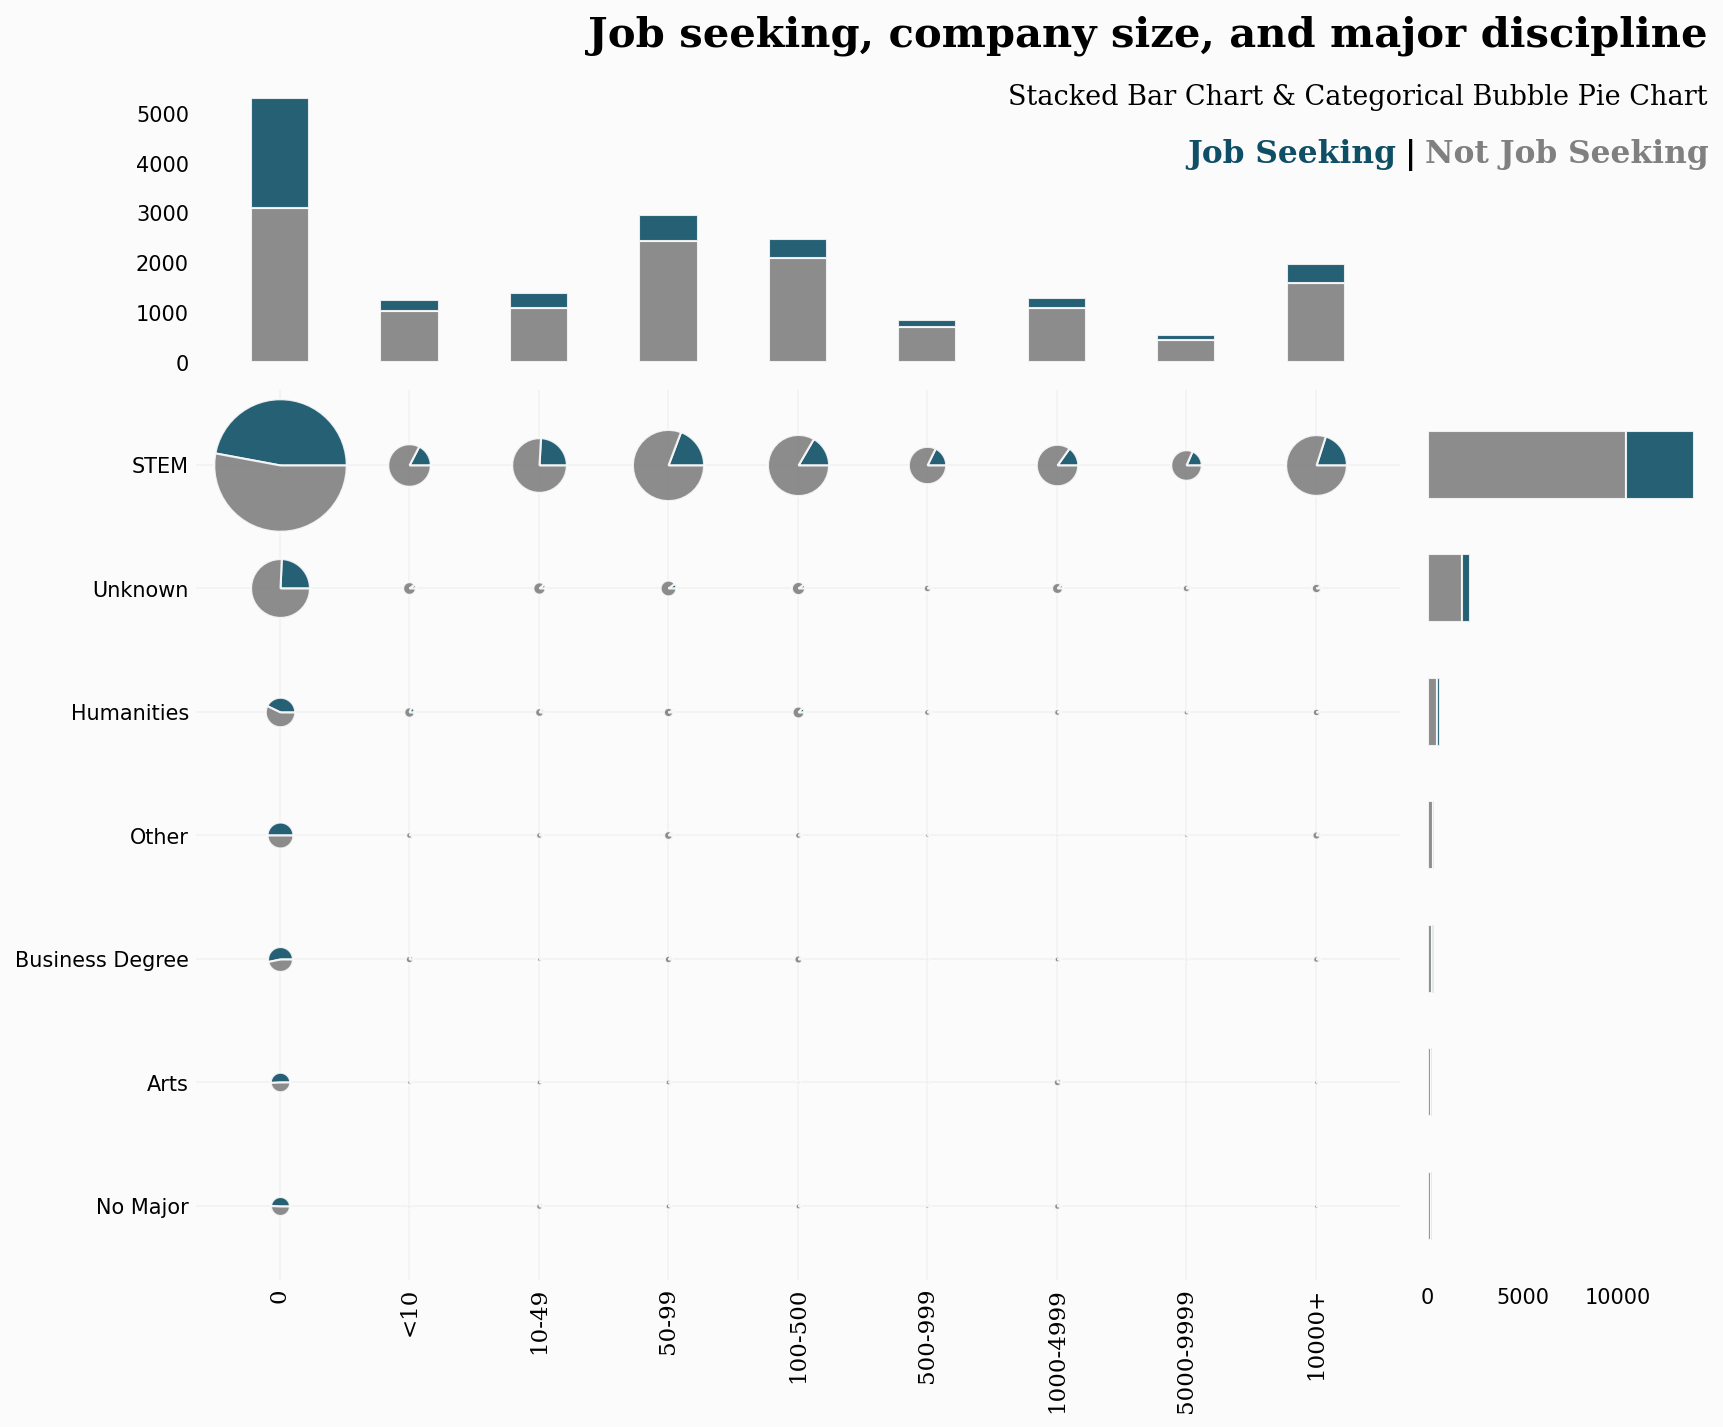

In [66]:
# Plot inspired by Subin An

fig = plt.figure(figsize=(13, 13), dpi=150)
gs = fig.add_gridspec(5, 5)
gs.update(wspace=0.1, hspace=0.1)
fig.patch.set_facecolor(background_color) 

# Pie 

ax_centre = fig.add_subplot(gs[1:4, 0:4]) 
for cl_idx in disc_order[::-1]:
    for age_idx in size_order:
        seek = data_job_seek[cl_idx][age_idx]
        no_seek = data_no_job_seek[cl_idx][age_idx]
        total = data_job_seek[cl_idx][age_idx]
        drawPieMarker([age_idx],[cl_idx], [seek/(seek+no_seek), no_seek/(seek+no_seek)] ,[total*2.5], ["#0e4f66", "gray"], ax=ax_centre)

ax_centre.grid(linewidth=0.1)        
ax_centre.set_facecolor(background_color)
ax_centre.set_xticklabels(size_order,fontfamily='serif', fontsize=11, rotation=90)

 # Top
ax_top = fig.add_subplot(gs[0, :4], sharex=ax_centre) 
c_size_non = data[data['target']==0]['company_size'].value_counts()[size_order]
ax_top.bar(c_size_non.index, c_size_non, width=0.45, alpha=0.9,ec=background_color, color='gray')

c_size = data[data['target']==1]['company_size'].value_counts()[size_order]
ax_top.bar(c_size.index, c_size, bottom=c_size_non , width=0.45, alpha=0.9, ec=background_color,color='#0e4f66')

plt.setp(ax_top.get_xticklabels(), visible=False)
ax_top.set_facecolor(background_color)

# Side 
ax_side = fig.add_subplot(gs[1:4, 4], sharey=ax_centre) 
disc_no = data[data['target']==0]['major_discipline'].value_counts()[disc_order]
ax_side.barh(disc_no.index[::-1], disc_no[::-1], height=0.55, alpha=0.9,ec=background_color, color='gray')

disc_yes = data[data['target']==1]['major_discipline'].value_counts()[disc_order]
ax_side.barh(disc_yes.index[::-1], disc_yes[::-1], left= disc_no[::-1],height=0.55, alpha=0.9, ec=background_color,color='#0e4f66')

plt.setp(ax_side.get_yticklabels(), visible=False)
ax_side.set_facecolor(background_color)

# Spines
for s in ['top', 'left', 'right', 'bottom']:
    ax_centre.spines[s].set_visible(False)
    ax_top.spines[s].set_visible(False)
    ax_side.spines[s].set_visible(False)
ax_centre.set_axisbelow(True)    

fig.text(0.9, 0.9, 'Job seeking, company size, and major discipline', fontweight='bold', fontfamily='serif', fontsize=20, ha='right') 
fig.text(0.9, 0.87, 'Stacked Bar Chart & Categorical Bubble Pie Chart', fontweight='light', fontfamily='serif', fontsize=13, ha='right')

fig.text(0.633,0.84,"Job Seeking", fontweight="bold", fontfamily='serif', fontsize=15, color='#0e4f66')
fig.text(0.745,0.84,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.755,0.84,"Not Job Seeking", fontweight="bold", fontfamily='serif', fontsize=15, color='gray')

ax_centre.tick_params(axis=u'both', which=u'both',length=0)
ax_top.tick_params(axis=u'both', which=u'both',length=0)
ax_side.tick_params(axis=u'both', which=u'both',length=0)

plt.tight_layout()
plt.show()

In [67]:
ed_order = ['Primary School','High School','Graduate','Masters','Phd']
enroll_order = ['No Enrollment','Part time course','Full time course']
disc_order = ['STEM','Unknown','Humanities','Other','Business Degree','Arts','No Major']
exp_yrs_order = ['<1','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','>20']
exp_yrs_order_2 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
size_order = ['0','<10', '10-49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+']
job_order = ['Never', '1', '2', '3', '4', '>4']
exp_order =['No relevant experience','Has relevant experience']
gender_order = ['Male','Female','Other','Not provided']

In [68]:
job_change = aug_train.groupby(['education_level','last_new_job'])['experience'].sum().unstack().loc[ed_order,job_order]
jc_never = job_change['Never']


job_change_norm = pd.crosstab(aug_train['education_level'],aug_train['last_new_job'],normalize='columns').loc[ed_order,job_order,]
job_change_norm = round(job_change_norm*100,1).astype(int)




##
job_hunt_only = aug_train[aug_train['target']==1]
no_job_hunt_only = aug_train[aug_train['target']==0]


seekers_job_change_norm = pd.crosstab(job_hunt_only['education_level'],job_hunt_only['last_new_job'],normalize='columns').loc[ed_order,job_order,]
seekers_job_change_norm = round(seekers_job_change_norm*100,1).astype(int)
seekers_job_change_norm

non_seekers_job_change_norm = pd.crosstab(no_job_hunt_only['education_level'],no_job_hunt_only['last_new_job'],normalize='columns').loc[ed_order,job_order,]
non_seekers_job_change_norm = round(non_seekers_job_change_norm*100,1).astype(int)

# Prediction

In [69]:
# Extra libs

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, f1_score, r2_score, confusion_matrix
from sklearn.svm import LinearSVC
#from imblearn.over_sampling import BorderlineSMOTE
from numpy import where

pip install scikit-learn==1.1
pip install imbalanced-learn==0.9

In [70]:
list_of_columns = ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level',
                   'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']

aug_train_dummies_df = []

for col in list_of_columns:
    dummy_train_df = pd.get_dummies(aug_train[col])
    aug_train_dummies_df.append(dummy_train_df)


list_of_columns.append('enrollee_id')    
aug_train_dummies_df.insert(0, aug_train.drop(columns=list_of_columns))

aug_train = pd.concat(aug_train_dummies_df,axis=1)
aug_train = aug_train.drop('count', 1)

# Final look at our df
aug_train.head(3)

/var/folders/lw/1sybpw410f1113dmy6sq3n7r0000gn/T/ipykernel_5101/4042017105.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  aug_train = aug_train.drop('count', 1)


city_development_index  training_hours  target  city_1  city_10  city_100  \
0                   0.920              36     1.0       0        0         0   
1                   0.776              47     0.0       0        0         0   
2                   0.624              83     0.0       0        0         0   

   city_101  city_102  city_103  city_104  ...  Other  Public Sector  Pvt Ltd  \
0         0         0         1         0  ...      0              0        0   
1         0         0         0         0  ...      0              0        1   
2         0         0         0         0  ...      0              0        0   

   Unknown  1  2  3  4  >4  Never  
0        1  1  0  0  0   0      0  
1        0  0  0  0  0   1      0  
2        1  0  0  0  0   0      1  

[3 rows x 190 columns]

# Modelling

### Linear SVM

In [71]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# 데이터 준비
X = aug_train.dropna().drop(columns=['target']).values
y = aug_train.dropna()['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=80)

# Define scalers and samplers
scalers = [None, StandardScaler(), MinMaxScaler(), RobustScaler()]
samplers = [None, SMOTE(), ADASYN(), BorderlineSMOTE()]

# Results storage
results = []

for scaler in scalers:
    for sampler in samplers:
        steps = []
        
        if scaler is not None:
            steps.append(('scaler', scaler))
        if sampler is not None:
            steps.append(('sampler', sampler))
        
        steps.append(('classifier', LinearSVC(dual=False, random_state=123)))
        
        # Create pipeline
        pipeline = Pipeline(steps)
        
        try:
            # Fit model
            pipeline.fit(X_train, y_train)
            
            # Predict
            y_pred = pipeline.predict(X_test)
            
            # Evaluate
            metrics = {
                'Model': 'LinearSVC',
                'Scaler': scaler.__class__.__name__ if scaler is not None else 'None',
                'Sampler': sampler.__class__.__name__ if sampler is not None else 'None',
                'Accuracy': accuracy_score(y_test, y_pred),
                'Recall': recall_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred),
                'ROC AUC Score': roc_auc_score(y_test, y_pred),
                'F1 Score': f1_score(y_test, y_pred),
            }
            results.append(metrics)
        except Exception as e:
            print(f"Error with scaler {scaler.__class__.__name__ if scaler else 'None'} and sampler {sampler.__class__.__name__ if sampler else 'None'}: {e}")

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df


Model          Scaler          Sampler  Accuracy    Recall  Precision  \
0   LinearSVC            None             None  0.784829  0.363215   0.580964   
1   LinearSVC            None            SMOTE  0.770398  0.747295   0.514088   
2   LinearSVC            None           ADASYN  0.768918  0.747295   0.511911   
3   LinearSVC            None  BorderlineSMOTE  0.769473  0.746522   0.512739   
4   LinearSVC  StandardScaler             None  0.784089  0.360896   0.578686   
5   LinearSVC  StandardScaler            SMOTE  0.762997  0.738794   0.503423   
6   LinearSVC  StandardScaler           ADASYN  0.753191  0.758887   0.490020   
7   LinearSVC  StandardScaler  BorderlineSMOTE  0.748936  0.753478   0.484352   
8   LinearSVC    MinMaxScaler             None  0.784459  0.363215   0.579531   
9   LinearSVC    MinMaxScaler            SMOTE  0.768363  0.741886   0.511182   
10  LinearSVC    MinMaxScaler           ADASYN  0.755967  0.731839   0.493486   
11  LinearSVC    MinMaxScaler  BorderlineSMOTE  0.754672  0.746522   0.491853   
12  LinearSVC    RobustScaler             None  0.784459  0.363215   0.579531   
13  LinearSVC    RobustScaler            SMOTE  0.768178  0.740340   0.510933   
14  LinearSVC    RobustScaler           ADASYN  0.754487  0.756569   0.491713   
15  LinearSVC    RobustScaler  BorderlineSMOTE  0.754672  0.753478   0.491927   

    ROC AUC Score  F1 Score  
0        0.640377  0.446981  
1        0.762482  0.609134  
2        0.761509  0.607603  
3        0.761610  0.607930  
4        0.639096  0.444550  
5        0.754705  0.598810  
6        0.755143  0.595512  
7        0.750492  0.589658  
8        0.640133  0.446556  
9        0.759291  0.605296  
10       0.747700  0.589480  
11       0.751880  0.593002  
12       0.640133  0.446556  
13       0.758640  0.604607  
14       0.755200  0.596043  
15       0.754263  0.595238

### Support Vector Machine

#### sigmoid

In [72]:
from sklearn.svm import SVC

# Results storage
results = []

for scaler in scalers:
    for sampler in samplers:
        steps = []
        
        scaler_name = scaler.__class__.__name__ if scaler is not None else 'None'
        sampler_name = sampler.__class__.__name__ if sampler is not None else 'None'
        
        if scaler is not None:
            steps.append(('scaler', scaler))
        if sampler is not None:
            steps.append(('sampler', sampler))
        
        steps.append(('classifier', SVC(kernel='sigmoid', random_state=123)))
        
        # Create pipeline
        pipeline = Pipeline(steps)
        
        try:
            # Fit model
            pipeline.fit(X_train, y_train)
            
            # Predict
            y_pred = pipeline.predict(X_test)
            
            # Evaluate
            metrics = {
                'Model': 'SVC (Sigmoid Kernel)',
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'Accuracy': accuracy_score(y_test, y_pred),
                'Recall': recall_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred),
                'ROC AUC Score': roc_auc_score(y_test, y_pred),
                'F1 Score': f1_score(y_test, y_pred),
            }
            results.append(metrics)
        except Exception as e:
            print(f"Error with scaler {scaler_name} and sampler {sampler_name}: {e}")

# Convert results to DataFrame
results_temp_df = pd.DataFrame(results)
results_df = pd.concat([results_df, results_temp_df], ignore_index=True)
results_df

KeyboardInterrupt: 

#### poly

In [ ]:
from sklearn.svm import SVC

# Results storage
results = []

for scaler in scalers:
    for sampler in samplers:
        steps = []
        
        scaler_name = scaler.__class__.__name__ if scaler is not None else 'None'
        sampler_name = sampler.__class__.__name__ if sampler is not None else 'None'
        
        if scaler is not None:
            steps.append(('scaler', scaler))
        if sampler is not None:
            steps.append(('sampler', sampler))
        
        steps.append(('classifier', SVC(kernel='poly', random_state=123)))
        
        # Create pipeline
        pipeline = Pipeline(steps)
        
        try:
            # Fit model
            pipeline.fit(X_train, y_train)
            
            # Predict
            y_pred = pipeline.predict(X_test)
            
            # Evaluate
            metrics = {
                'Model': 'SVC (Poly Kernel)',
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'Accuracy': accuracy_score(y_test, y_pred),
                'Recall': recall_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred),
                'ROC AUC Score': roc_auc_score(y_test, y_pred),
                'F1 Score': f1_score(y_test, y_pred),
            }
            results.append(metrics)
        except Exception as e:
            print(f"Error with scaler {scaler_name} and sampler {sampler_name}: {e}")

# Convert results to DataFrame
results_temp_df = pd.DataFrame(results)
results_df = pd.concat([results_df, results_temp_df], ignore_index=True)
results_df

Model          Scaler          Sampler  Accuracy    Recall  \
0              LinearSVC            None             None  0.784829  0.363215   
1              LinearSVC            None            SMOTE  0.771693  0.739567   
2              LinearSVC            None           ADASYN  0.766327  0.744977   
3              LinearSVC            None  BorderlineSMOTE  0.767253  0.740340   
4              LinearSVC  StandardScaler             None  0.784089  0.360896   
5              LinearSVC  StandardScaler            SMOTE  0.765217  0.740340   
6              LinearSVC  StandardScaler           ADASYN  0.753006  0.756569   
7              LinearSVC  StandardScaler  BorderlineSMOTE  0.749861  0.755796   
8              LinearSVC    MinMaxScaler             None  0.784459  0.363215   
9              LinearSVC    MinMaxScaler            SMOTE  0.767068  0.737249   
10             LinearSVC    MinMaxScaler           ADASYN  0.758372  0.742658   
11             LinearSVC    MinMaxScaler  BorderlineSMOTE  0.754672  0.747295   
12             LinearSVC    RobustScaler             None  0.784459  0.363215   
13             LinearSVC    RobustScaler            SMOTE  0.766327  0.737249   
14             LinearSVC    RobustScaler           ADASYN  0.751156  0.755023   
15             LinearSVC    RobustScaler  BorderlineSMOTE  0.752636  0.753478   
16  SVC (Sigmoid Kernel)            None             None  0.629602  0.236476   
17  SVC (Sigmoid Kernel)            None            SMOTE  0.492137  0.507728   
18  SVC (Sigmoid Kernel)            None           ADASYN  0.497687  0.502318   
19  SVC (Sigmoid Kernel)            None  BorderlineSMOTE  0.502313  0.497682   
20  SVC (Sigmoid Kernel)  StandardScaler             None  0.783719  0.394127   
21  SVC (Sigmoid Kernel)  StandardScaler            SMOTE  0.741906  0.744977   
22  SVC (Sigmoid Kernel)  StandardScaler           ADASYN  0.721739  0.769706   
23  SVC (Sigmoid Kernel)  StandardScaler  BorderlineSMOTE  0.723404  0.761978   
24  SVC (Sigmoid Kernel)    MinMaxScaler             None  0.716189  0.409583   
25  SVC (Sigmoid Kernel)    MinMaxScaler            SMOTE  0.632192  0.636012   
26  SVC (Sigmoid Kernel)    MinMaxScaler           ADASYN  0.617576  0.651468   
27  SVC (Sigmoid Kernel)    MinMaxScaler  BorderlineSMOTE  0.635338  0.645286   
28  SVC (Sigmoid Kernel)    RobustScaler             None  0.703053  0.360896   
29  SVC (Sigmoid Kernel)    RobustScaler            SMOTE  0.661610  0.661515   
30  SVC (Sigmoid Kernel)    RobustScaler           ADASYN  0.624607  0.660742   
31  SVC (Sigmoid Kernel)    RobustScaler  BorderlineSMOTE  0.628307  0.607419   
32     SVC (Poly Kernel)            None             None  0.760037  0.001546   
33     SVC (Poly Kernel)            None            SMOTE  0.337280  0.948223   
34     SVC (Poly Kernel)            None           ADASYN  0.758557  0.284389   
35     SVC (Poly Kernel)            None  BorderlineSMOTE  0.393895  0.925811   
36     SVC (Poly Kernel)  StandardScaler             None  0.758742  0.091963   
37     SVC (Poly Kernel)  StandardScaler            SMOTE  0.766327  0.687790   
38     SVC (Poly Kernel)  StandardScaler           ADASYN  0.745606  0.717156   
39     SVC (Poly Kernel)  StandardScaler  BorderlineSMOTE  0.758927  0.708655   
40     SVC (Poly Kernel)    MinMaxScaler             None  0.800185  0.578825   
41     SVC (Poly Kernel)    MinMaxScaler            SMOTE  0.789269  0.699382   
42     SVC (Poly Kernel)    MinMaxScaler           ADASYN  0.779833  0.707883   
43     SVC (Poly Kernel)    MinMaxScaler  BorderlineSMOTE  0.785569  0.717156   
44     SVC (Poly Kernel)    RobustScaler             None  0.793340  0.561051   
45     SVC (Poly Kernel)    RobustScaler            SMOTE  0.790009  0.687017   
46     SVC (Poly Kernel)    RobustScaler           ADASYN  0.779463  0.697836   
47     SVC (Poly Kernel)    RobustScaler  BorderlineSMOTE  0.781314  0.698609   

    Precision  ROC AUC Score  F1 Score  
0    0.5

#### rbf

In [ ]:
from sklearn.svm import SVC

# Results storage
results = []

for scaler in scalers:
    for sampler in samplers:
        steps = []
        
        scaler_name = scaler.__class__.__name__ if scaler is not None else 'None'
        sampler_name = sampler.__class__.__name__ if sampler is not None else 'None'
        
        if scaler is not None:
            steps.append(('scaler', scaler))
        if sampler is not None:
            steps.append(('sampler', sampler))
        
        steps.append(('classifier', SVC(kernel='rbf', random_state=123)))
        
        # Create pipeline
        pipeline = Pipeline(steps)
        
        try:
            # Fit model
            pipeline.fit(X_train, y_train)
            
            # Predict
            y_pred = pipeline.predict(X_test)
            
            # Evaluate
            metrics = {
                'Model': 'SVC (RBF Kernel)',
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'Accuracy': accuracy_score(y_test, y_pred),
                'Recall': recall_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred),
                'ROC AUC Score': roc_auc_score(y_test, y_pred),
                'F1 Score': f1_score(y_test, y_pred),
            }
            results.append(metrics)
        except Exception as e:
            print(f"Error with scaler {scaler_name} and sampler {sampler_name}: {e}")

# Convert results to DataFrame
results_temp_df = pd.DataFrame(results)
results_df = pd.concat([results_df, results_temp_df], ignore_index=True)
results_df.tail(17)

/Users/juwonjung/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model          Scaler          Sampler  Accuracy    Recall  \
47  SVC (Poly Kernel)    RobustScaler  BorderlineSMOTE  0.781314  0.698609   
48   SVC (RBF Kernel)            None             None  0.760592  0.000000   
49   SVC (RBF Kernel)            None            SMOTE  0.724884  0.501546   
50   SVC (RBF Kernel)            None           ADASYN  0.729695  0.492272   
51   SVC (RBF Kernel)            None  BorderlineSMOTE  0.690657  0.565688   
52   SVC (RBF Kernel)  StandardScaler             None  0.792229  0.499227   
53   SVC (RBF Kernel)  StandardScaler            SMOTE  0.784644  0.687790   
54   SVC (RBF Kernel)  StandardScaler           ADASYN  0.773913  0.713292   
55   SVC (RBF Kernel)  StandardScaler  BorderlineSMOTE  0.779463  0.715611   
56   SVC (RBF Kernel)    MinMaxScaler             None  0.798705  0.561051   
57   SVC (RBF Kernel)    MinMaxScaler            SMOTE  0.800000  0.660742   
58   SVC (RBF Kernel)    MinMaxScaler           ADASYN  0.799260  0.651468   
59   SVC (RBF Kernel)    MinMaxScaler  BorderlineSMOTE  0.798705  0.667697   
60   SVC (RBF Kernel)    RobustScaler             None  0.799075  0.572643   
61   SVC (RBF Kernel)    RobustScaler            SMOTE  0.795190  0.657651   
62   SVC (RBF Kernel)    RobustScaler           ADASYN  0.796485  0.653014   
63   SVC (RBF Kernel)    RobustScaler  BorderlineSMOTE  0.796300  0.677743   

    Precision  ROC AUC Score  F1 Score  
47   0.533019       0.752978  0.604682  
48   0.000000       0.500000  0.000000  
49   0.435278       0.648365  0.466068  
50   0.442054       0.648350  0.465814  
51   0.397394       0.647840  0.466837  
52   0.576271       0.691842  0.534990  
53   0.539394       0.751460  0.604620  
54   0.520293       0.753143  0.601695  
55   0.529143       0.757586  0.608410  
56   0.582665       0.717281  0.571654  
57   0.571142       0.752288  0.612684  
58   0.570752       0.748624  0.608445  
59   0.567674       0.753819  0.613636  
60   0.581633       0.721495  0.577103  
61   0.561716       0.748066  0.605910  
62   0.564840       0.747329  0.605735  
63   0.561819       0.755680  0.614361

### Decision Tree

In [ ]:
# Results storage
results = []

for scaler in scalers:
    for sampler in samplers:
        steps = []
        
        scaler_name = scaler.__class__.__name__ if scaler is not None else 'None'
        sampler_name = sampler.__class__.__name__ if sampler is not None else 'None'
        
        if scaler is not None:
            steps.append(('scaler', scaler))
        if sampler is not None:
            steps.append(('sampler', sampler))
        
        steps.append(('classifier', DecisionTreeClassifier(random_state=123)))
        
        # Create pipeline
        pipeline = Pipeline(steps)
        
        try:
            # Fit model
            pipeline.fit(X_train, y_train)
            
            # Predict
            y_pred = pipeline.predict(X_test)
            
            # Evaluate
            metrics = {
                'Model': 'Decision Tree',
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'Accuracy': accuracy_score(y_test, y_pred),
                'Recall': recall_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred),
                'ROC AUC Score': roc_auc_score(y_test, y_pred),
                'F1 Score': f1_score(y_test, y_pred),
            }
            results.append(metrics)
        except Exception as e:
            print(f"Error with scaler {scaler_name} and sampler {sampler_name}: {e}")

# Convert results to DataFrame
results_temp_df = pd.DataFrame(results)
results_df = pd.concat([results_df, results_temp_df], ignore_index=True)
results_df.tail(17)

Model          Scaler          Sampler  Accuracy    Recall  \
63  SVC (RBF Kernel)    RobustScaler  BorderlineSMOTE  0.796300  0.677743   
64     Decision Tree            None             None  0.729695  0.472952   
65     Decision Tree            None            SMOTE  0.729325  0.479907   
66     Decision Tree            None           ADASYN  0.732655  0.476816   
67     Decision Tree            None  BorderlineSMOTE  0.727290  0.465224   
68     Decision Tree  StandardScaler             None  0.729880  0.472952   
69     Decision Tree  StandardScaler            SMOTE  0.733025  0.488408   
70     Decision Tree  StandardScaler           ADASYN  0.730620  0.487635   
71     Decision Tree  StandardScaler  BorderlineSMOTE  0.737095  0.503091   
72     Decision Tree    MinMaxScaler             None  0.729695  0.472952   
73     Decision Tree    MinMaxScaler            SMOTE  0.732840  0.470634   
74     Decision Tree    MinMaxScaler           ADASYN  0.725254  0.487635   
75     Decision Tree    MinMaxScaler  BorderlineSMOTE  0.733210  0.497682   
76     Decision Tree    RobustScaler             None  0.729695  0.472952   
77     Decision Tree    RobustScaler            SMOTE  0.720629  0.476816   
78     Decision Tree    RobustScaler           ADASYN  0.733580  0.493045   
79     Decision Tree    RobustScaler  BorderlineSMOTE  0.727475  0.452087   

    Precision  ROC AUC Score  F1 Score  
63   0.561819       0.755680  0.614361  
64   0.439971       0.641730  0.455866  
65   0.440113       0.643870  0.459150  
66   0.445487       0.645000  0.460620  
67   0.434971       0.637501  0.449589  
68   0.440288       0.641852  0.456036  
69   0.447275       0.649215  0.466938  
70   0.443118       0.647369  0.464312  
71   0.455563       0.656921  0.478149  
72   0.439971       0.641730  0.455866  
73   0.445175       0.643004  0.457551  
74   0.434274       0.643842  0.459410  
75   0.448468       0.652514  0.471795  
76   0.439971       0.641730  0.455866  
77   0.425517       0.637094  0.449708  
78   0.448664       0.651168  0.469809  
79   0.433655       0.633122  0.442679

### Random Forest

In [ ]:
# Results storage
results = []

for scaler in scalers:
    for sampler in samplers:
        steps = []
        
        scaler_name = scaler.__class__.__name__ if scaler is not None else 'None'
        sampler_name = sampler.__class__.__name__ if sampler is not None else 'None'
        
        if scaler is not None:
            steps.append(('scaler', scaler))
        if sampler is not None:
            steps.append(('sampler', sampler))
        
        steps.append(('classifier', RandomForestClassifier(n_estimators=600)))
        
        # Create pipeline
        pipeline = Pipeline(steps)
        
        try:
            # Fit model
            pipeline.fit(X_train, y_train)
            
            # Predict
            y_pred = pipeline.predict(X_test)
            
            # Evaluate
            metrics = {
                'Model': 'Random Forest',
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'Accuracy': accuracy_score(y_test, y_pred),
                'Recall': recall_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred),
                'ROC AUC Score': roc_auc_score(y_test, y_pred),
                'F1 Score': f1_score(y_test, y_pred),
            }
            results.append(metrics)
        except Exception as e:
            print(f"Error with scaler {scaler_name} and sampler {sampler_name}: {e}")

# Convert results to DataFrame
results_temp_df = pd.DataFrame(results)
results_df = pd.concat([results_df, results_temp_df], ignore_index=True)
results_df.tail(17)

Model          Scaler          Sampler  Accuracy    Recall  \
79  Decision Tree    RobustScaler  BorderlineSMOTE  0.727475  0.452087   
80  Random Forest            None             None  0.786679  0.482998   
81  Random Forest            None            SMOTE  0.788529  0.510046   
82  Random Forest            None           ADASYN  0.788529  0.505410   
83  Random Forest            None  BorderlineSMOTE  0.787974  0.504637   
84  Random Forest  StandardScaler             None  0.788159  0.483771   
85  Random Forest  StandardScaler            SMOTE  0.787419  0.521638   
86  Random Forest  StandardScaler           ADASYN  0.786864  0.510819   
87  Random Forest  StandardScaler  BorderlineSMOTE  0.784459  0.513138   
88  Random Forest    MinMaxScaler             None  0.787419  0.484544   
89  Random Forest    MinMaxScaler            SMOTE  0.788714  0.546368   
90  Random Forest    MinMaxScaler           ADASYN  0.788344  0.543277   
91  Random Forest    MinMaxScaler  BorderlineSMOTE  0.788159  0.541731   
92  Random Forest    RobustScaler             None  0.787789  0.486862   
93  Random Forest    RobustScaler            SMOTE  0.787604  0.533230   
94  Random Forest    RobustScaler           ADASYN  0.788899  0.542504   
95  Random Forest    RobustScaler  BorderlineSMOTE  0.787974  0.537094   

    Precision  ROC AUC Score  F1 Score  
79   0.433655       0.633122  0.442679  
80   0.563571       0.682633  0.520183  
81   0.564585       0.693116  0.535932  
82   0.565255       0.691527  0.533660  
83   0.563903       0.690898  0.532626  
84   0.567543       0.683871  0.522320  
85   0.560166       0.696358  0.540216  
86   0.560169       0.692286  0.534357  
87   0.553795       0.691499  0.532692  
88   0.565374       0.683649  0.521848  
89   0.560222       0.705682  0.553208  
90   0.559713       0.704380  0.551373  
91   0.559457       0.703729  0.550452  
92   0.566038       0.684686  0.523473  
93   0.559157       0.700451  0.545886  
94   0.561151       0.704480  0.551670  
95   0.559581       0.702018  0.548107

In [ ]:
# Results storage
results = []

for scaler in scalers:
    for sampler in samplers:
        steps = []
        
        scaler_name = scaler.__class__.__name__ if scaler is not None else 'None'
        sampler_name = sampler.__class__.__name__ if sampler is not None else 'None'
        
        if scaler is not None:
            steps.append(('scaler', scaler))
        if sampler is not None:
            steps.append(('sampler', sampler))
        
        steps.append(('classifier', RandomForestClassifier(random_state=0, n_estimators= 800, criterion = 'gini', max_features = 'sqrt', max_depth = 8)))
        
        # Create pipeline
        pipeline = Pipeline(steps)
        
        try:
            # Fit model
            pipeline.fit(X_train, y_train)
            
            # Predict
            y_pred = pipeline.predict(X_test)
            
            # Evaluate
            metrics = {
                'Model': 'Tuned Random Forest',
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'Accuracy': accuracy_score(y_test, y_pred),
                'Recall': recall_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred),
                'ROC AUC Score': roc_auc_score(y_test, y_pred),
                'F1 Score': f1_score(y_test, y_pred),
            }
            results.append(metrics)
        except Exception as e:
            print(f"Error with scaler {scaler_name} and sampler {sampler_name}: {e}")

# Convert results to DataFrame
results_temp_df = pd.DataFrame(results)
results_df = pd.concat([results_df, results_temp_df], ignore_index=True)
results_df.tail(17)

Model          Scaler          Sampler  Accuracy    Recall  \
95         Random Forest    RobustScaler  BorderlineSMOTE  0.787974  0.537094   
96   Tuned Random Forest            None             None  0.769473  0.107419   
97   Tuned Random Forest            None            SMOTE  0.791859  0.705564   
98   Tuned Random Forest            None           ADASYN  0.790194  0.704791   
99   Tuned Random Forest            None  BorderlineSMOTE  0.792044  0.710201   
100  Tuned Random Forest  StandardScaler             None  0.769473  0.107419   
101  Tuned Random Forest  StandardScaler            SMOTE  0.788344  0.717929   
102  Tuned Random Forest  StandardScaler           ADASYN  0.780574  0.712519   
103  Tuned Random Forest  StandardScaler  BorderlineSMOTE  0.781129  0.713292   
104  Tuned Random Forest    MinMaxScaler             None  0.769473  0.107419   
105  Tuned Random Forest    MinMaxScaler            SMOTE  0.772248  0.744977   
106  Tuned Random Forest    MinMaxScaler           ADASYN  0.771508  0.746522   
107  Tuned Random Forest    MinMaxScaler  BorderlineSMOTE  0.758002  0.758114   
108  Tuned Random Forest    RobustScaler             None  0.769473  0.107419   
109  Tuned Random Forest    RobustScaler            SMOTE  0.778538  0.740340   
110  Tuned Random Forest    RobustScaler           ADASYN  0.765957  0.751932   
111  Tuned Random Forest    RobustScaler  BorderlineSMOTE  0.763737  0.751159   

     Precision  ROC AUC Score  F1 Score  
95    0.559581       0.702018  0.548107  
96    0.604348       0.542642  0.182415  
97    0.550996       0.762293  0.618773  
98    0.548077       0.760934  0.616633  
99    0.550959       0.764003  0.620527  
100   0.604348       0.542642  0.182415  
101   0.543911       0.764219  0.618921  
102   0.531106       0.757257  0.608581  
103   0.531988       0.757887  0.609442  
104   0.604348       0.542642  0.182415  
105   0.516890       0.762904  0.610320  
106   0.515750       0.762947  0.610041  
107   0.496457       0.758040  0.600000  
108   0.604348       0.542642  0.182415  
109   0.526663       0.765451  0.615483  
110   0.507564       0.761152  0.606042  
111   0.504411       0.759428  0.603539

### Logistic Regression

In [ ]:
# Results storage
results = []

for scaler in scalers:
    for sampler in samplers:
        steps = []
        
        scaler_name = scaler.__class__.__name__ if scaler is not None else 'None'
        sampler_name = sampler.__class__.__name__ if sampler is not None else 'None'
        
        if scaler is not None:
            steps.append(('scaler', scaler))
        if sampler is not None:
            steps.append(('sampler', sampler))
        
        steps.append(('classifier', LogisticRegression(max_iter=2000)))
        
        # Create pipeline
        pipeline = Pipeline(steps)
        
        try:
            # Fit model
            pipeline.fit(X_train, y_train)
            
            # Predict
            y_pred = pipeline.predict(X_test)
            
            # Evaluate
            metrics = {
                'Model': 'Logistic Regression',
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'Accuracy': accuracy_score(y_test, y_pred),
                'Recall': recall_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred),
                'ROC AUC Score': roc_auc_score(y_test, y_pred),
                'F1 Score': f1_score(y_test, y_pred),
            }
            results.append(metrics)
        except Exception as e:
            print(f"Error with scaler {scaler_name} and sampler {sampler_name}: {e}")

# Convert results to DataFrame
results_temp_df = pd.DataFrame(results)
results_df = pd.concat([results_df, results_temp_df], ignore_index=True)
results_df.tail(17)

Model          Scaler          Sampler  Accuracy    Recall  \
111  Tuned Random Forest    RobustScaler  BorderlineSMOTE  0.763737  0.751159   
112  Logistic Regression            None             None  0.780389  0.354714   
113  Logistic Regression            None            SMOTE  0.771323  0.741113   
114  Logistic Regression            None           ADASYN  0.769843  0.749614   
115  Logistic Regression            None  BorderlineSMOTE  0.769658  0.751932   
116  Logistic Regression  StandardScaler             None  0.781129  0.360124   
117  Logistic Regression  StandardScaler            SMOTE  0.763552  0.739567   
118  Logistic Regression  StandardScaler           ADASYN  0.753377  0.758114   
119  Logistic Regression  StandardScaler  BorderlineSMOTE  0.750046  0.753478   
120  Logistic Regression    MinMaxScaler             None  0.780389  0.357032   
121  Logistic Regression    MinMaxScaler            SMOTE  0.769843  0.739567   
122  Logistic Regression    MinMaxScaler           ADASYN  0.757632  0.741113   
123  Logistic Regression    MinMaxScaler  BorderlineSMOTE  0.759482  0.748068   
124  Logistic Regression    RobustScaler             None  0.780389  0.357032   
125  Logistic Regression    RobustScaler            SMOTE  0.766142  0.742658   
126  Logistic Regression    RobustScaler           ADASYN  0.754302  0.761206   
127  Logistic Regression    RobustScaler  BorderlineSMOTE  0.754672  0.751159   

     Precision  ROC AUC Score  F1 Score  
111   0.504411       0.759428  0.603539  
112   0.565968       0.634545  0.436105  
113   0.515591       0.760972  0.608117  
114   0.513228       0.762912  0.609296  
115   0.512915       0.763585  0.609840  
116   0.567600       0.636885  0.440662  
117   0.504215       0.755335  0.599624  
118   0.490255       0.755000  0.595448  
119   0.485800       0.751222  0.590730  
120   0.565483       0.635339  0.437707  
121   0.513412       0.759470  0.606080  
122   0.495863       0.751972  0.594176  
123   0.498455       0.755571  0.598269  
124   0.565483       0.635339  0.437707  
125   0.507928       0.758096  0.603264  
126   0.491517       0.756667  0.597332  
127   0.491903       0.753468  0.594495

### KNN

In [ ]:
# Results storage
results = []

for scaler in scalers:
    for sampler in samplers:
        steps = []
        
        scaler_name = scaler.__class__.__name__ if scaler is not None else 'None'
        sampler_name = sampler.__class__.__name__ if sampler is not None else 'None'
        
        if scaler is not None:
            steps.append(('scaler', scaler))
        if sampler is not None:
            steps.append(('sampler', sampler))
        
        steps.append(('classifier', KNeighborsClassifier(n_neighbors=17)))
        
        # Create pipeline
        pipeline = Pipeline(steps)
        
        try:
            # Fit model
            pipeline.fit(X_train, y_train)
            
            # Predict
            y_pred = pipeline.predict(X_test)
            
            # Evaluate
            metrics = {
                'Model': 'KNN',
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'Accuracy': accuracy_score(y_test, y_pred),
                'Recall': recall_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred),
                'ROC AUC Score': roc_auc_score(y_test, y_pred),
                'F1 Score': f1_score(y_test, y_pred),
            }
            results.append(metrics)
        except Exception as e:
            print(f"Error with scaler {scaler_name} and sampler {sampler_name}: {e}")

# Convert results to DataFrame
results_temp_df = pd.DataFrame(results)
results_df = pd.concat([results_df, results_temp_df], ignore_index=True)
x.tail(17)

Model          Scaler          Sampler  Accuracy    Recall  Precision  \
143   KNN    RobustScaler  BorderlineSMOTE  0.605920  0.836167   0.360667   
144   KNN            None             None  0.767253  0.232612   0.531802   
145   KNN            None            SMOTE  0.515079  0.851623   0.312093   
146   KNN            None           ADASYN  0.465680  0.864760   0.292015   
147   KNN            None  BorderlineSMOTE  0.486031  0.856260   0.299459   
148   KNN  StandardScaler             None  0.777798  0.359351   0.555556   
149   KNN  StandardScaler            SMOTE  0.621832  0.817620   0.369156   
150   KNN  StandardScaler           ADASYN  0.565772  0.854714   0.338744   
151   KNN  StandardScaler  BorderlineSMOTE  0.597225  0.845440   0.356236   
152   KNN    MinMaxScaler             None  0.784459  0.486862   0.557029   
153   KNN    MinMaxScaler            SMOTE  0.575578  0.859351   0.344913   
154   KNN    MinMaxScaler           ADASYN  0.503423  0.886399   0.311346   
155   KNN    MinMaxScaler  BorderlineSMOTE  0.550231  0.870943   0.332350   
156   KNN    RobustScaler             None  0.785939  0.509274   0.558002   
157   KNN    RobustScaler            SMOTE  0.636263  0.826893   0.380512   
158   KNN    RobustScaler           ADASYN  0.551711  0.850077   0.330430   
159   KNN    RobustScaler  BorderlineSMOTE  0.612026  0.840804   0.365223   

     ROC AUC Score  F1 Score  
143       0.684807  0.503959  
144       0.584075  0.323656  
145       0.630385  0.456788  
146       0.602412  0.436598  
147       0.612878  0.443732  
148       0.634431  0.436415  
149       0.688912  0.508654  
150       0.664769  0.485194  
151       0.682268  0.501260  
152       0.682497  0.519588  
153       0.672804  0.492253  
154       0.634637  0.460828  
155       0.660113  0.481110  
156       0.691149  0.532525  
157       0.701576  0.521189  
158       0.653937  0.475881  
159       0.690409  0.509244

### XGBoost

In [ ]:
from xgboost import XGBClassifier

# Results storage
results = []

for scaler in scalers:
    for sampler in samplers:
        steps = []
        
        scaler_name = scaler.__class__.__name__ if scaler is not None else 'None'
        sampler_name = sampler.__class__.__name__ if sampler is not None else 'None'
        
        if scaler is not None:
            steps.append(('scaler', scaler))
        if sampler is not None:
            steps.append(('sampler', sampler))
        
        steps.append(('classifier', XGBClassifier()))
        
        # Create pipeline
        pipeline = Pipeline(steps)
        
        try:
            # Fit model
            pipeline.fit(X_train, y_train)
            
            # Predict
            y_pred = pipeline.predict(X_test)
            
            # Evaluate
            metrics = {
                'Model': 'XGBoost',
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'Accuracy': accuracy_score(y_test, y_pred),
                'Recall': recall_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred),
                'ROC AUC Score': roc_auc_score(y_test, y_pred),
                'F1 Score': f1_score(y_test, y_pred),
            }
            results.append(metrics)
        except Exception as e:
            print(f"Error with scaler {scaler_name} and sampler {sampler_name}: {e}")

# Convert results to DataFrame
results_temp_df = pd.DataFrame(results)
results_df = pd.concat([results_df, results_temp_df], ignore_index=True)
results_df.tail(17)

Model          Scaler          Sampler  Accuracy    Recall  Precision  \
158  XGBoost    RobustScaler  BorderlineSMOTE  0.793895  0.588099   0.567064   
159  XGBoost            None             None  0.789269  0.520093   0.565071   
160  XGBoost            None            SMOTE  0.789084  0.523184   0.564167   
161  XGBoost            None           ADASYN  0.788159  0.521638   0.562032   
162  XGBoost            None  BorderlineSMOTE  0.792969  0.540958   0.571429   
163  XGBoost  StandardScaler             None  0.789269  0.520093   0.565071   
164  XGBoost  StandardScaler            SMOTE  0.790194  0.561824   0.561824   
165  XGBoost  StandardScaler           ADASYN  0.790749  0.547913   0.564940   
166  XGBoost  StandardScaler  BorderlineSMOTE  0.790749  0.556414   0.563821   
167  XGBoost    MinMaxScaler             None  0.789269  0.520093   0.565071   
168  XGBoost    MinMaxScaler            SMOTE  0.794450  0.591190   0.567929   
169  XGBoost    MinMaxScaler           ADASYN  0.794265  0.581917   0.568731   
170  XGBoost    MinMaxScaler  BorderlineSMOTE  0.793525  0.586553   0.566418   
171  XGBoost    RobustScaler             None  0.789269  0.520093   0.565071   
172  XGBoost    RobustScaler            SMOTE  0.793525  0.584235   0.566717   
173  XGBoost    RobustScaler           ADASYN  0.795745  0.579598   0.572519   
174  XGBoost    RobustScaler  BorderlineSMOTE  0.795005  0.587326   0.569715   

     ROC AUC Score  F1 Score  
158       0.723385  0.577390  
159       0.697045  0.541650  
160       0.697982  0.542903  
161       0.696844  0.541082  
162       0.706626  0.555776  
163       0.697045  0.541650  
164       0.711951  0.561824  
165       0.707550  0.556297  
166       0.710462  0.560093  
167       0.697045  0.541650  
168       0.724809  0.579326  
169       0.721510  0.575248  
170       0.722613  0.576310  
171       0.697045  0.541650  
172       0.721818  0.575342  
173       0.721689  0.576037  
174       0.723850  0.578387

# So far

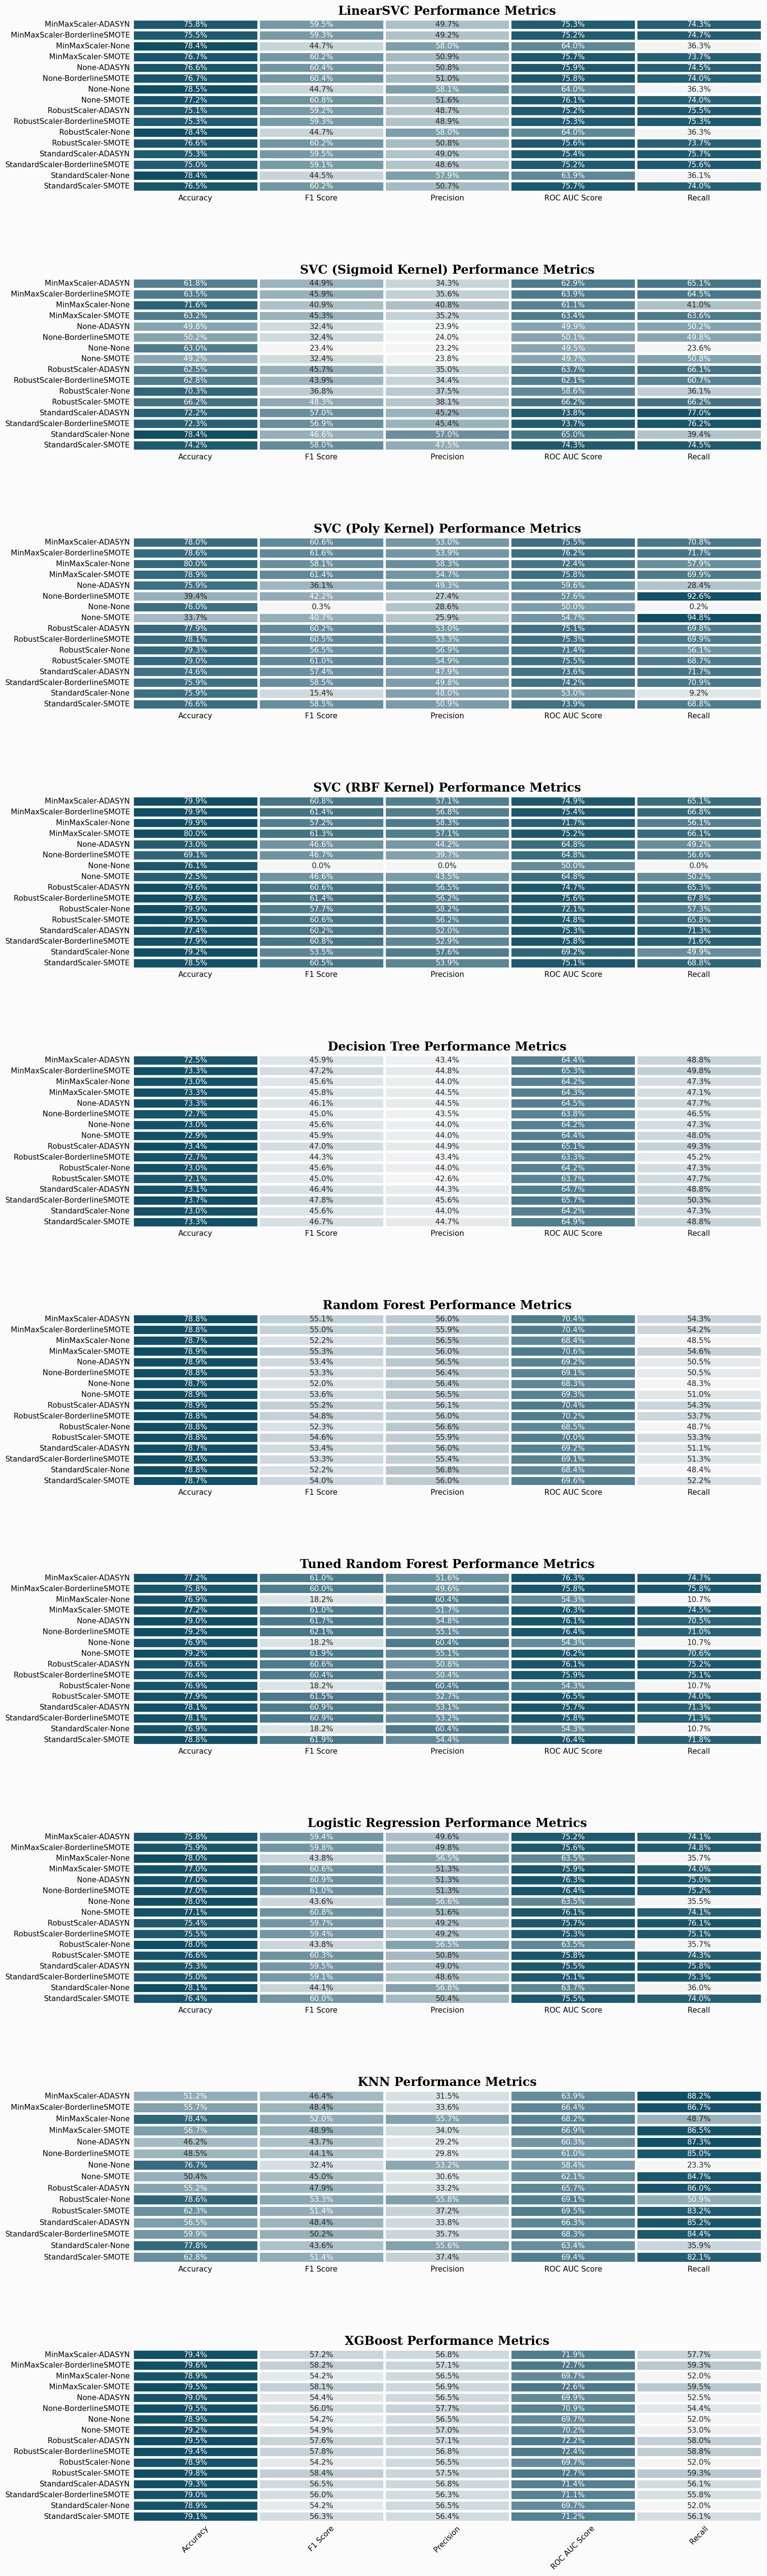

In [ ]:
from matplotlib.patches import Rectangle

# Define unique models
unique_models = results_df['Model'].unique()

# Adjust the figure and grid size
fig, axes = plt.subplots(len(unique_models), 1, figsize=(15, len(unique_models) * 6), dpi=150)
fig.subplots_adjust(hspace=0.5)

# Define colors and colormap
colors = ["#f5f5f5", "#0e4f66"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)  # figure background color

# Iterate over each model and plot
for ax, model in zip(axes, unique_models):
    # Filter data for the specific model
    model_data = results_df[results_df['Model'] == model]
    
    # Pivot the data for heatmap
    model_pivot = model_data.pivot_table(index=['Scaler', 'Sampler'], 
                                         values=['Accuracy', 'Recall', 'Precision', 'ROC AUC Score', 'F1 Score'],
                                         aggfunc='mean')
    
    # Draw the heatmap
    sns.heatmap(model_pivot, cmap=colormap, annot=True, fmt=".1%", linewidths=2.5, cbar=False, ax=ax)
    
    # Customize appearance
    ax.set_facecolor(background_color)
    ax.set_title(f'{model} Performance Metrics', fontfamily='serif', fontsize=16, fontweight='bold')
    ax.tick_params(axis=u'both', which=u'both', length=0)
    ax.set_xlabel('')
    ax.set_ylabel('')

    # Optionally highlight specific rows if needed
    # Example: Highlight RobustScaler rows
    # for row in model_pivot.index:
    #     if 'RobustScaler' in row:
    #         idx = model_pivot.index.get_loc(row)
    #         rect = ax.add_patch(Rectangle((0, idx), len(model_pivot.columns), 1, fill=True,
    #                                       color='#0e4f66', edgecolor='white', lw=0, alpha=0.5))

# Display the plot
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

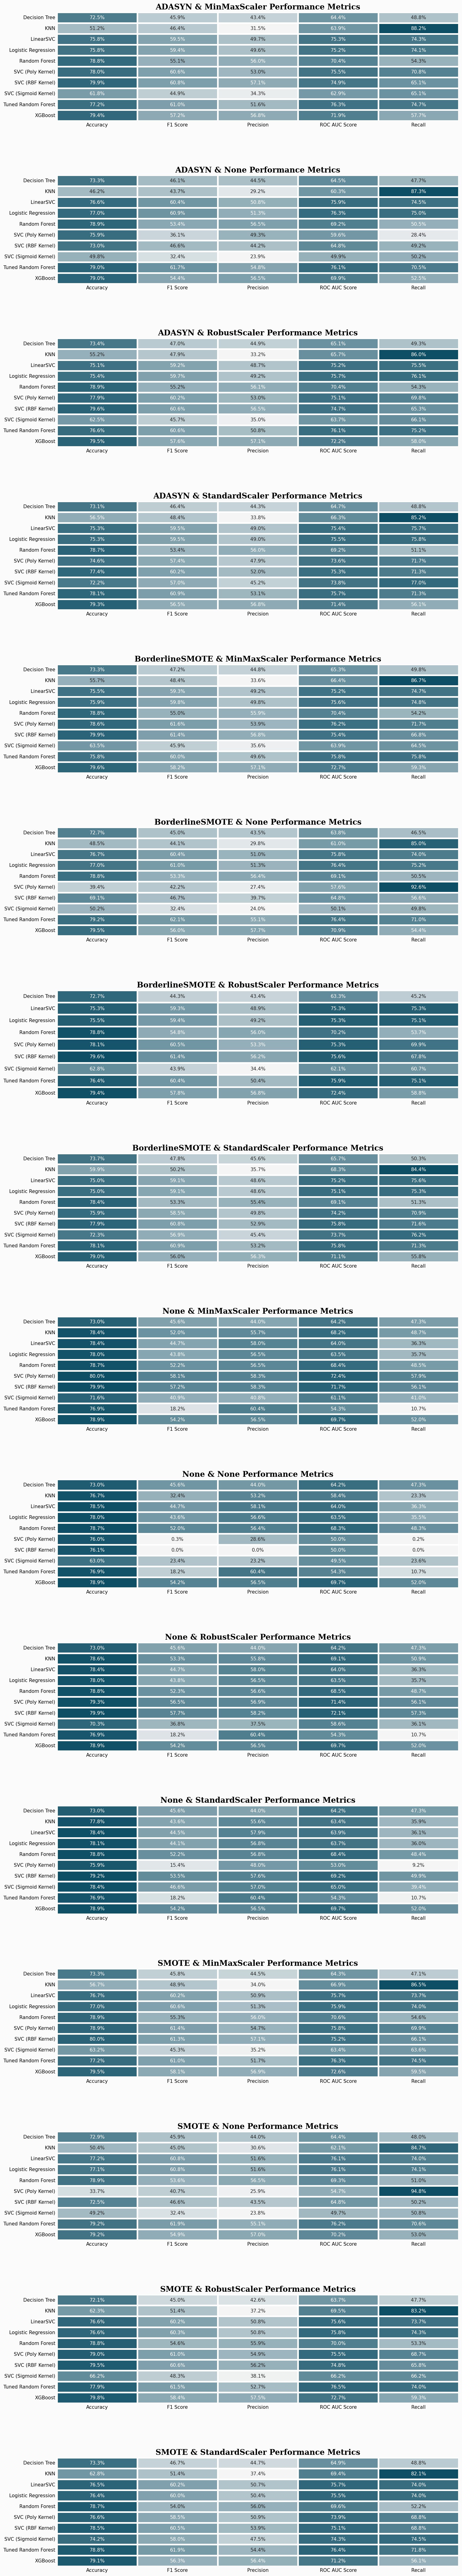

In [ ]:
# Define unique sampler-scaler combinations
unique_combinations = results_df.groupby(['Sampler', 'Scaler']).size().reset_index().drop(0, axis=1)

# Adjust the figure and grid size
fig, axes = plt.subplots(len(unique_combinations), 1, figsize=(15, len(unique_combinations) * 6), dpi=150)
fig.subplots_adjust(hspace=0.5)

# Define colors and colormap
colors = ["#f5f5f5", "#0e4f66"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)  # figure background color

# Iterate over each sampler-scaler combination and plot
for ax, (sampler, scaler) in zip(axes, unique_combinations.values):
    # Filter data for the specific combination
    combo_data = results_df[(results_df['Sampler'] == sampler) & (results_df['Scaler'] == scaler)]
    
    # Pivot the data for heatmap
    combo_pivot = combo_data.pivot_table(index=['Model'], 
                                         values=['Accuracy', 'Recall', 'Precision', 'ROC AUC Score', 'F1 Score'],
                                         aggfunc='mean')
    
    # Draw the heatmap
    sns.heatmap(combo_pivot, cmap=colormap, annot=True, fmt=".1%", linewidths=2.5, cbar=False, ax=ax)
    
    # Customize appearance
    ax.set_facecolor(background_color)
    ax.set_title(f'{sampler} & {scaler} Performance Metrics', fontfamily='serif', fontsize=16, fontweight='bold')
    ax.tick_params(axis=u'both', which=u'both', length=0)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Display the plot
plt.show()

In [ ]:
average_metrics = results_df.groupby(['Sampler', 'Scaler']).agg({
    'Accuracy': 'mean',
    'Recall': 'mean',
    'Precision': 'mean',
    'ROC AUC Score': 'mean',
    'F1 Score': 'mean'
}).reset_index()

# Display the average metrics
print(average_metrics)

# Optional: Display in a formatted table
average_metrics_display = average_metrics.style.background_gradient(cmap='viridis').set_caption("Average Metrics by Sampler and Scaler")
average_metrics_display


            Sampler          Scaler  Accuracy    Recall  Precision  \
0            ADASYN    MinMaxScaler  0.736069  0.664255   0.490571   
1            ADASYN            None  0.715869  0.580301   0.470521   
2            ADASYN    RobustScaler  0.739702  0.666924   0.492276   
3            ADASYN  StandardScaler  0.745185  0.672755   0.494640   
4   BorderlineSMOTE    MinMaxScaler  0.742074  0.670577   0.494185   
5   BorderlineSMOTE            None  0.682382  0.645426   0.448628   
6   BorderlineSMOTE    RobustScaler  0.758131  0.640417   0.505406   
7   BorderlineSMOTE  StandardScaler  0.749458  0.671280   0.497779   
8              None    MinMaxScaler  0.775410  0.441970   0.546870   
9              None            None  0.758826  0.299283   0.448573   
10             None    RobustScaler  0.773795  0.439230   0.542696   
11             None  StandardScaler  0.776705  0.379092   0.551828   
12            SMOTE    MinMaxScaler  0.746245  0.662639   0.499329   
13            SMOTE 

/var/folders/lw/1sybpw410f1113dmy6sq3n7r0000gn/T/ipykernel_5101/703379380.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(average_metrics.pivot('Sampler', 'Scaler'), annot=True, fmt=".3f", cmap='coolwarm', ax=ax)


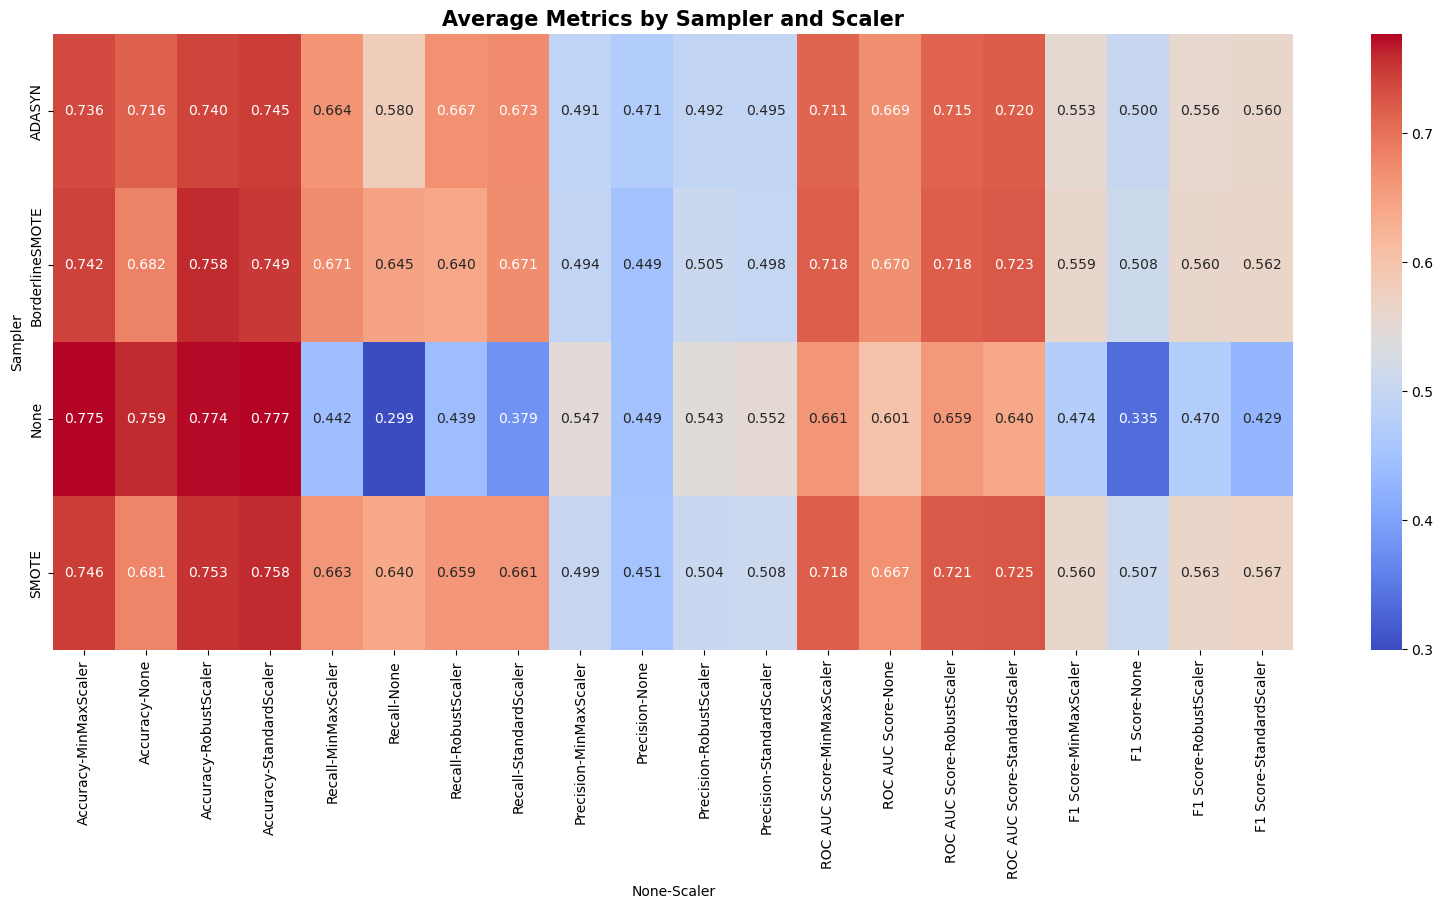

In [ ]:
# Display the results as a heatmap for better visualization
fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(average_metrics.pivot('Sampler', 'Scaler'), annot=True, fmt=".3f", cmap='coolwarm', ax=ax)
ax.set_title('Average Metrics by Sampler and Scaler', fontsize=15, fontweight='bold')
plt.show()

/var/folders/lw/1sybpw410f1113dmy6sq3n7r0000gn/T/ipykernel_2833/727121460.py:24: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = ax0.add_patch(Rectangle((0, 2), 6, 1, fill=True,color='#0e4f66', edgecolor='white', lw=0,alpha=0.5))
/var/folders/lw/1sybpw410f1113dmy6sq3n7r0000gn/T/ipykernel_2833/727121460.py:25: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = ax0.add_patch(Rectangle((0, 3), 6, 1, fill=True,color='#0e4f66', edgecolor='white', lw=0,alpha=0.5))


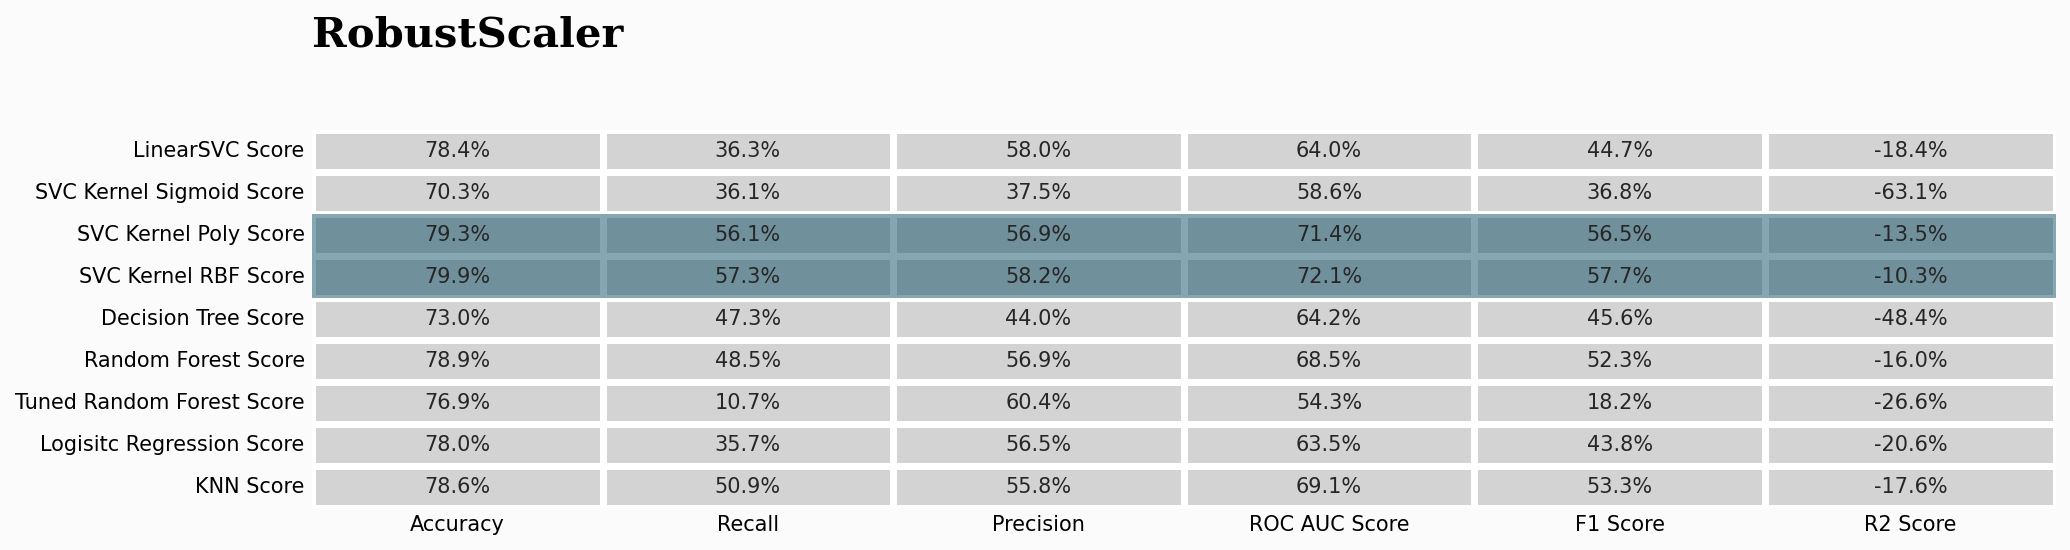

In [64]:
fig = plt.figure(figsize=(15,18), dpi=150)
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

colors = ["lightgray","lightgray"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color)

# Overall
sns.heatmap(results_df.T, cmap=colormap,annot=True,fmt=".1%", linewidths=2.5,cbar=False,ax=ax0)

ax0.tick_params(axis=u'both', which=u'both',length=0)
ax0.text(0,-2,'RobustScaler',fontfamily='serif',fontsize=20,fontweight='bold')
#ax0.text(0,-0.7,'We saw earlier that our dataset was imbalanced.\nWill using SMOTE improve our scores? We have the Random Forest scores to beat.',fontfamily='serif',fontsize=14)

from matplotlib.patches import Rectangle

# rect = ax0.add_patch(Rectangle((0, 2), 6, 1, fill=True,color='#0e4f66', edgecolor='white', lw=0,alpha=0.5))
# rect = ax0.add_patch(Rectangle((0, 3), 6, 1, fill=True,color='#0e4f66', edgecolor='white', lw=0,alpha=0.5))

plt.show()

# Implementing SMOTE

In [65]:
# Our data is unbalanced, we can fix this with SMOTE

from imblearn.over_sampling import SMOTE

X = aug_train.dropna().drop(columns=['target']).values
y = aug_train.dropna()['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=80)

oversample = SMOTE()
X_train_resh, y_train_resh = oversample.fit_resample(X_train, y_train.ravel())

In [41]:
# Scale our data in pipeline

linear_svm_pipeline = Pipeline(steps = [('scale',StandardScaler()),('SVM',LinearSVC(random_state=42))])
rf_pipeline = Pipeline(steps = [('scale',StandardScaler()),('RF',RandomForestClassifier(random_state=42))])
logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(random_state=42))])

In [42]:
#rf_cv = cross_val_score(rf_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')
#svm_cv = cross_val_score(svm_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')
#logreg_cv = cross_val_score(logreg_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')

In [43]:
print('Mean f1 scores:')
print('Random Forest mean :',cross_val_score(rf_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1').mean())
# removed svm as took an incredibly long time to fit
#print('SVM mean :',cross_val_score(svm_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1').mean())
print('Logistic Regression mean :',cross_val_score(logreg_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1').mean())

Mean f1 scores:
Random Forest mean : 0.8296410644464631
Logistic Regression mean : 0.7923274865043121


# Let's try the test data

In [44]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score

rf_pipeline.fit(X_train_resh,y_train_resh)
#svm_pipeline.fit(X_train_resh,y_train_resh)
logreg_pipeline.fit(X_train_resh,y_train_resh)

rf_pred   =rf_pipeline.predict(X_test)
#svm_pred  = svm_pipeline.predict(X_test)
logreg_pred   = logreg_pipeline.predict(X_test)

rf_cm  = confusion_matrix(y_test,rf_pred )
#svm_cm = confusion_matrix(y_test,svm_pred)
logreg_cm  = confusion_matrix(y_test,logreg_pred )

rf_f1  = f1_score(y_test,rf_pred)
#svm_f1 = f1_score(y_test,svm_pred)
logreg_f1  = f1_score(y_test,logreg_pred)

In [45]:
print('Mean scores:')
print('RF F1 score:',rf_f1)
print('RF Accuracy:',accuracy_score(y_test,rf_pred))
print('LR F1 score :',logreg_f1)
print('LR Accuracy:',accuracy_score(y_test,logreg_pred))

Mean scores:
RF F1 score: 0.5285016286644951
RF Accuracy: 0.7857539315448658
LR F1 score : 0.6056382641748496
LR Accuracy: 0.7696577243293247


In [46]:
smote_rf_df = pd.DataFrame(data=[accuracy_score(y_test, rf_pred), recall_score(y_test, rf_pred),
                   precision_score(y_test, rf_pred), roc_auc_score(y_test, rf_pred)], 
             columns=['SMOTE Random Forest Score'],
             index=["Accuracy", "Recall", "Precision", "ROC AUC Score"])

smote_logreg_df = pd.DataFrame(data=[accuracy_score(y_test, logreg_pred), recall_score(y_test, logreg_pred),
                   precision_score(y_test, logreg_pred), roc_auc_score(y_test, logreg_pred)], 
             columns=['SMOTE Logistic Regression Score'],
             index=["Accuracy", "Recall", "Precision", "ROC AUC Score"])


smote_cm_log = confusion_matrix(y_test, logreg_pred)
smote_cm_rf = confusion_matrix(y_test, rf_pred)

# Viewing our results in an accesible way¶
We now now need to find a way to view our results which can be easily explained to business stakeholders.

A simple annotated heatmap works well for this!

/var/folders/lw/1sybpw410f1113dmy6sq3n7r0000gn/T/ipykernel_21491/1418853736.py:51: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = ax0.add_patch(Rectangle((0, 6), 5, 1, fill=True,color='#0e4f66', edgecolor='white', lw=0,alpha=0.5))
/var/folders/lw/1sybpw410f1113dmy6sq3n7r0000gn/T/ipykernel_21491/1418853736.py:118: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax8.add_patch(Rectangle((1, 1), 1, 1, fill=True,color='#0e4f66', edgecolor='white', lw=0,alpha=0.5))


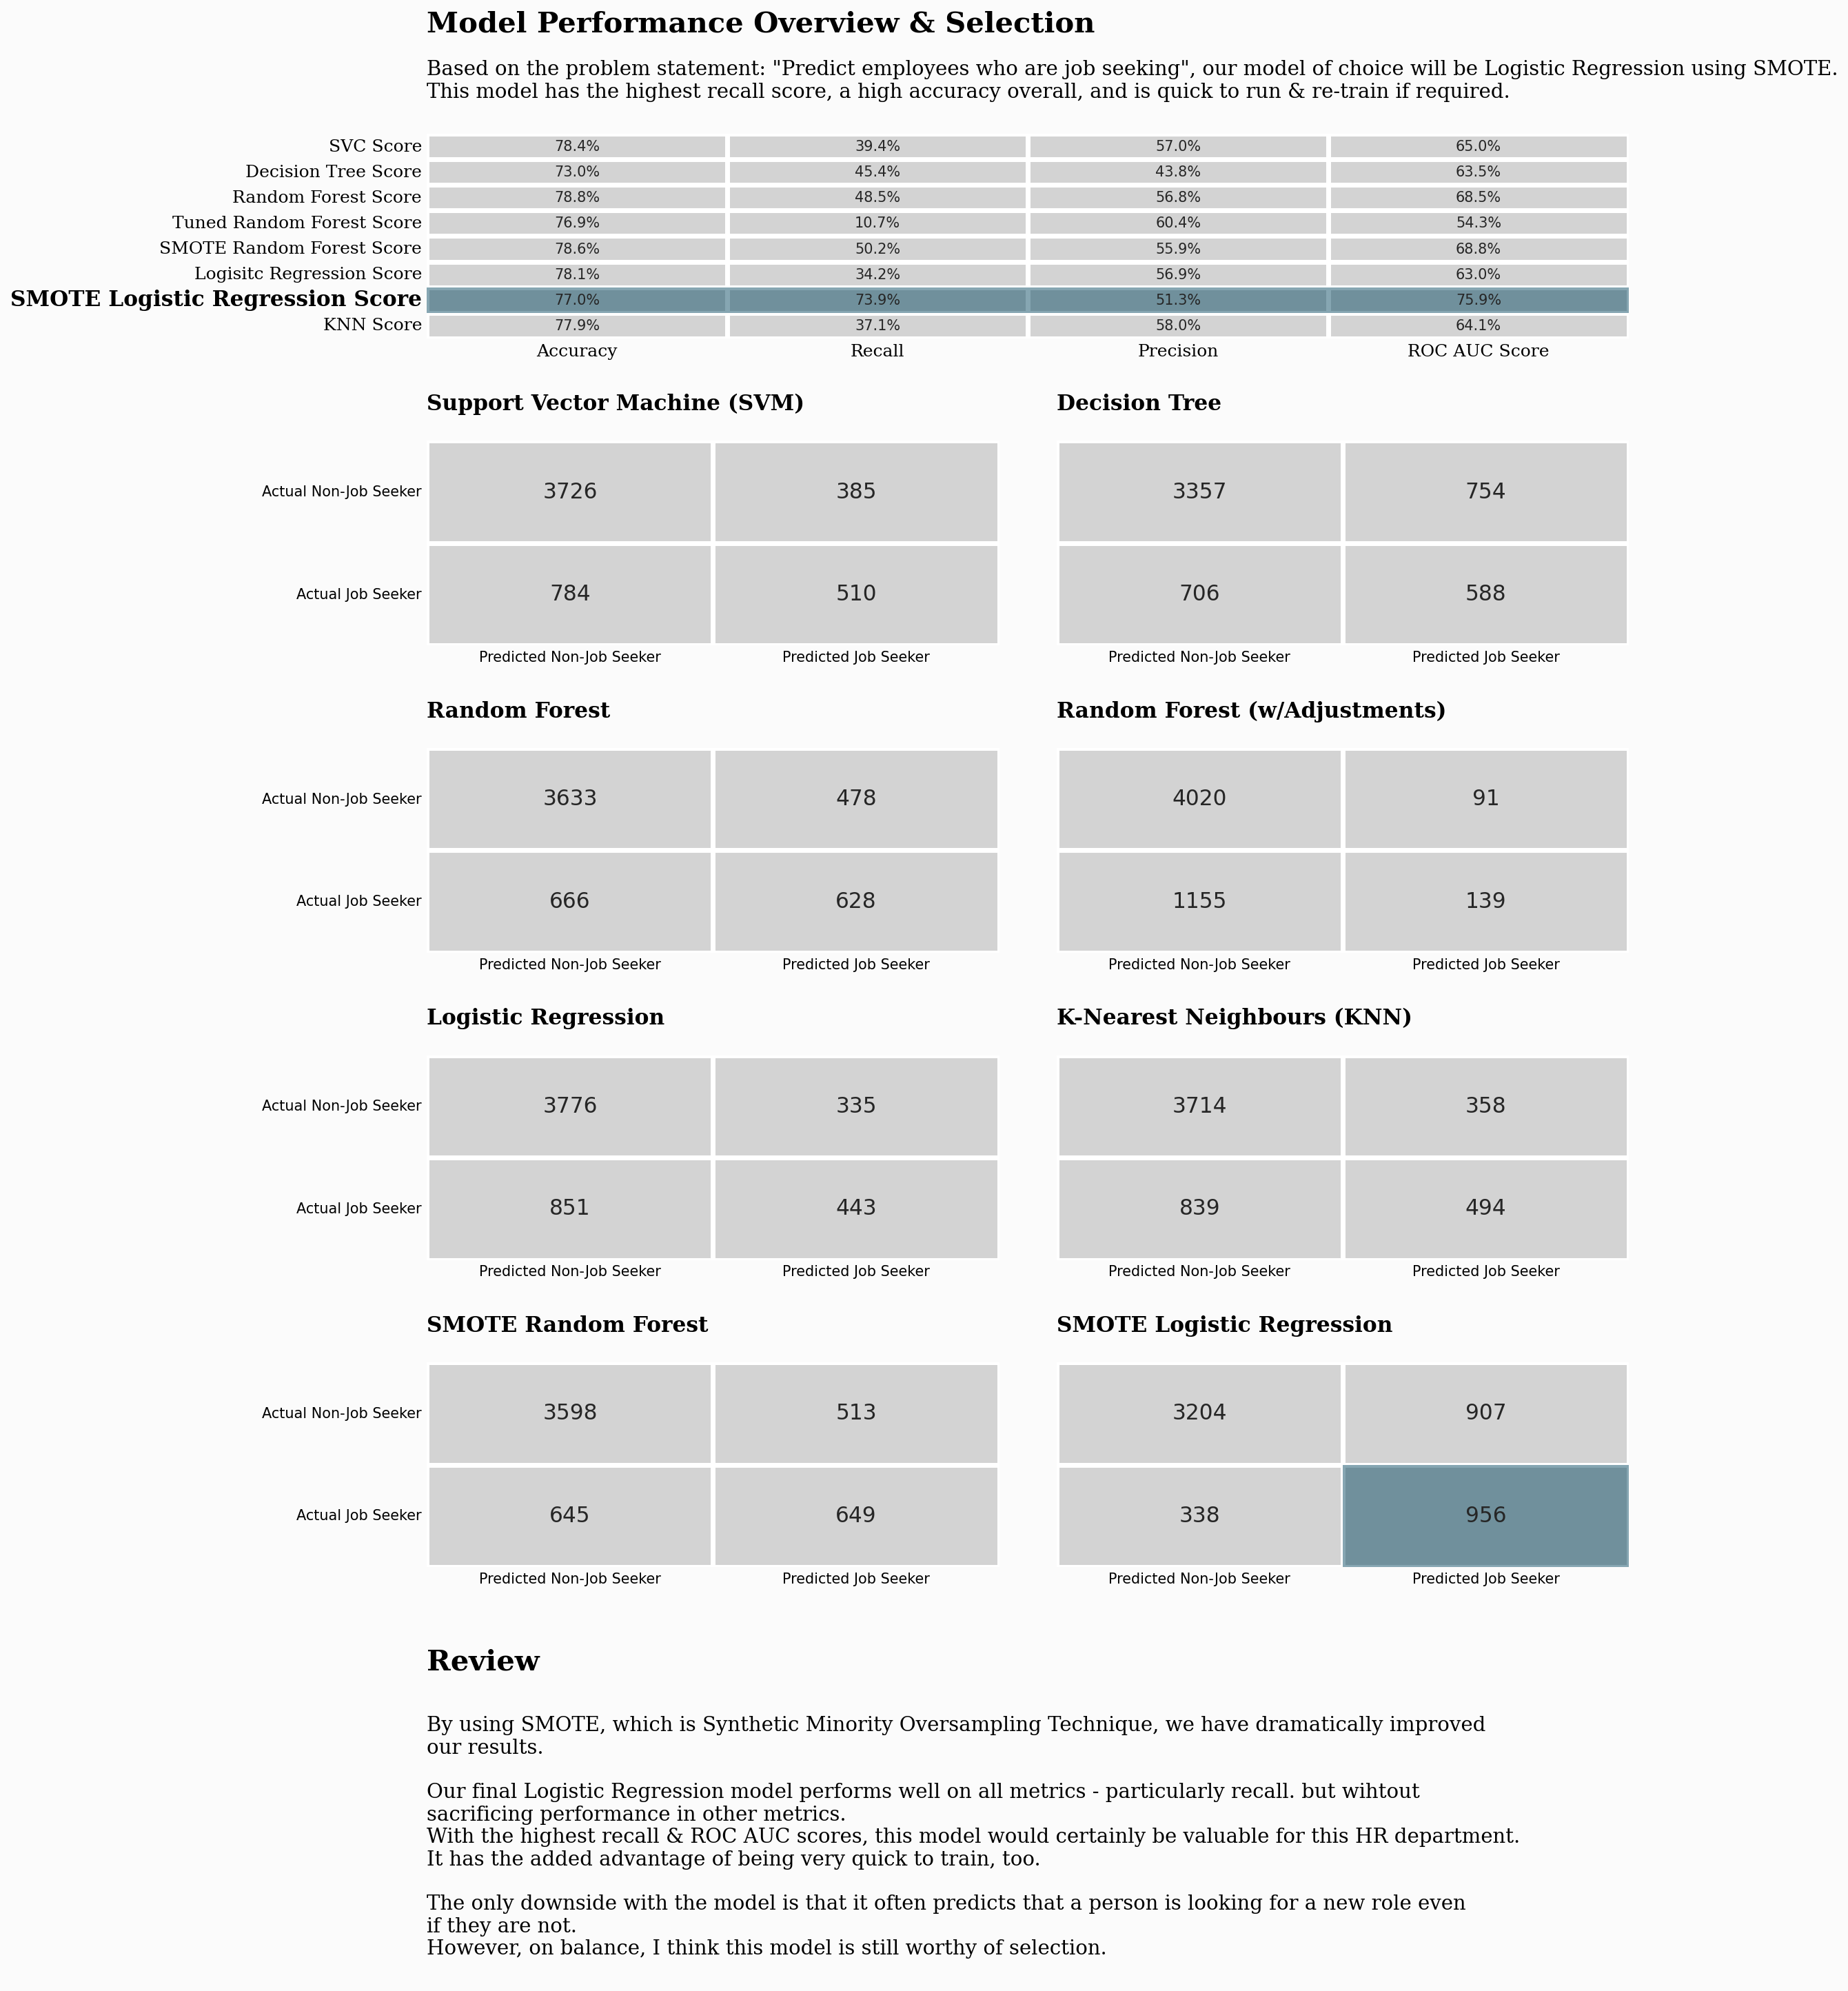

In [47]:
# Plotting our results

colors = ["lightgray","lightgray"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)


fig = plt.figure(figsize=(15,18), dpi=150) # create figure
gs = fig.add_gridspec(5, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1])
ax3 = fig.add_subplot(gs[2, 0])
ax4 = fig.add_subplot(gs[2, 1])
ax5 = fig.add_subplot(gs[3, 0])
ax6 = fig.add_subplot(gs[3,1])
ax7 = fig.add_subplot(gs[4,0])
ax8 = fig.add_subplot(gs[4,1])

# Overall
df_models = round(pd.concat([svc_df,dtree_df,rfc_df,trfc_df,smote_rf_df,log_df,smote_logreg_df,knn_df], axis=1),3)
sns.heatmap(df_models.T, cmap=colormap,annot=True,fmt=".1%", linewidths=2.5,cbar=False,ax=ax0)


ax0.set_yticklabels(ax0.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=12)
ax0.set_xticklabels(ax0.get_xticklabels(), fontfamily='serif', rotation=0, fontsize=12)

ax0.text(0,-4,'Model Performance Overview & Selection',fontfamily='serif',fontsize=20,fontweight='bold')
ax0.text(0,-0.55,
         '''
Based on the problem statement: "Predict employees who are job seeking", our model of choice will be Logistic Regression using SMOTE.
This model has the highest recall score, a high accuracy overall, and is quick to run & re-train if required.
'''
         ,fontfamily='serif',fontsize=14)



for lab, annot in zip(ax0.get_yticklabels(), ax0.texts):
    text =  lab.get_text()
    if text == 'SMOTE Logistic Regression Score': 
        # set the properties of the ticklabel
        lab.set_weight('bold')
        lab.set_size(15)
        lab.set_color('black')
        



from matplotlib.patches import Rectangle

rect = ax0.add_patch(Rectangle((0, 6), 5, 1, fill=True,color='#0e4f66', edgecolor='white', lw=0,alpha=0.5))



# svc
sns.heatmap(cm_svc, linewidths=2.5,yticklabels=['Actual Non-Job Seeker','Actual Job Seeker'],xticklabels=['Predicted Non-Job Seeker','Predicted Job Seeker'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax1,annot_kws={"fontsize":15})

# dtree
sns.heatmap(cm_dtree, linewidths=2.5,yticklabels=False,xticklabels=['Predicted Non-Job Seeker','Predicted Job Seeker'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax2,annot_kws={"fontsize":15})

# rf
sns.heatmap(cm_rfc, linewidths=2.5,yticklabels=['Actual Non-Job Seeker','Actual Job Seeker'],xticklabels=['Predicted Non-Job Seeker','Predicted Job Seeker'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax3,annot_kws={"fontsize":15})

# tuned rf
sns.heatmap(cm_trfc, linewidths=2.5,yticklabels=False,xticklabels=['Predicted Non-Job Seeker','Predicted Job Seeker'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax4,annot_kws={"fontsize":15})

# log
sns.heatmap(cm_log, linewidths=2.5,yticklabels=['Actual Non-Job Seeker','Actual Job Seeker'],xticklabels=['Predicted Non-Job Seeker','Predicted Job Seeker'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax5,annot_kws={"fontsize":15})

# knn
sns.heatmap(cm_knn, linewidths=2.5,yticklabels=False,xticklabels=['Predicted Non-Job Seeker','Predicted Job Seeker'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax6,annot_kws={"fontsize":15})

# smote rf
sns.heatmap(smote_cm_rf, linewidths=2.5,yticklabels=['Actual Non-Job Seeker','Actual Job Seeker'],xticklabels=['Predicted Non-Job Seeker','Predicted Job Seeker'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax7,annot_kws={"fontsize":15})

# smote log reg
sns.heatmap(smote_cm_log, linewidths=2.5,yticklabels=False,xticklabels=['Predicted Non-Job Seeker','Predicted Job Seeker'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax8,annot_kws={"fontsize":15})



background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) 

ax0.set_xlabel("")
ax0.set_ylabel("")


ax1.text(0, -0.3, 'Support Vector Machine (SVM)',fontsize=15, fontweight='bold', fontfamily='serif')
ax2.text(0, -0.3, 'Decision Tree', fontsize=15, fontweight='bold', fontfamily='serif')
ax3.text(0, -0.3, 'Random Forest',fontsize=15, fontweight='bold', fontfamily='serif')
ax4.text(0, -0.3, 'Random Forest (w/Adjustments)', fontsize=15, fontweight='bold', fontfamily='serif')
ax5.text(0, -0.3, 'Logistic Regression',fontsize=15, fontweight='bold', fontfamily='serif')
ax6.text(0, -0.3, 'K-Nearest Neighbours (KNN)', fontsize=15, fontweight='bold', fontfamily='serif')
ax7.text(0, -0.3, 'SMOTE Random Forest',fontsize=15, fontweight='bold', fontfamily='serif')
ax8.text(0, -0.3, 'SMOTE Logistic Regression', fontsize=15, fontweight='bold', fontfamily='serif')


ax7.text(0, 3, 'Review',fontsize=20, fontweight='bold', fontfamily='serif')
ax7.text(0, 6, 
'''
By using SMOTE, which is Synthetic Minority Oversampling Technique, we have dramatically improved
our results.

Our final Logistic Regression model performs well on all metrics - particularly recall. but wihtout
sacrificing performance in other metrics.
With the highest recall & ROC AUC scores, this model would certainly be valuable for this HR department.
It has the added advantage of being very quick to train, too.

The only downside with the model is that it often predicts that a person is looking for a new role even
if they are not. 
However, on balance, I think this model is still worthy of selection. 
''',fontsize=14, fontfamily='serif')


from matplotlib.patches import Rectangle


ax8.add_patch(Rectangle((1, 1), 1, 1, fill=True,color='#0e4f66', edgecolor='white', lw=0,alpha=0.5))

colors = ['gray','#0e4f66','#002d1d']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

for i in range(0,9):
    locals()["ax"+str(i)].set_facecolor(background_color) 
    
for i in range(0,9):
    locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both',length=0)


for s in ["top","right","left"]:
    for i in range(0,9):
        locals()["ax"+str(i)].spines[s].set_visible(False)

plt.show()

- 코드 수정한 결과 SMOTE RF, SMOTE Logistic regression 결과랑 KNN 결과, RF, DT 가 다르게 나온다.

# Something else... Borderline SMOTE
There are many oversampling techniques that one could employ.

A variation of the technique used above is Borderline SMOTE.

Borderline SMOTE involves selecting those instances of the minority class that are misclassified.

We can then oversample just those difficult instances, providing more resolution only where it may be required

A great article cab be found here:

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

## 이 부분도 있긴 한데, import 오류 나서,,, 실행은 안 할게요!! 그래도 우리가 찾은 코드들은 다 돌아갑니다.!!